In [1]:
%load_ext autoreload
%autoreload 2

from glycontact.process import *
from glycontact.visualize import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
import os
import warnings
warnings.filterwarnings("ignore")

# How many files from glycoshape are already compatible with glycontact?

In [2]:
### Download full glycoshape except those already downloaded and present in my glycans path
iupac_list = get_glycoshape_IUPAC()

my_glycans_path = "glycans_pdb/"
my_glycans_list = os.listdir(my_glycans_path)


for g in iupac_list:
    if g not in my_glycans_list and 'diacetimido' in g:
        print(g)
        #download_from_glycoshape(g)

In [36]:
#download took 72m

In [24]:
#Get all IUPAC from glycoshape and test conversion
#Report all cases that fail/succeed
iupac_list = get_glycoshape_IUPAC()
weird_list = [glycan for glycan in iupac_list if '(' not in glycan or glycan[-1]==']']
print(weird_list)
iupac_list = [glycan for glycan in iupac_list if '(' in glycan and glycan not in weird_list]

print(len(iupac_list))
g_list = iupac_list
success_fail_list = []
x = 1
for g_index in range(0,len(iupac_list)) :
    if ')' not in g_list[g_index]:
        break
    print(g_list[g_index])
    pdb_path = 'glycans_pdb'
    pdbs = os.listdir(pdb_path + '/' + iupac_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[0]
    except :
        print("PDB error")
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        df, _ = annotation_pipeline(pdb_file, iupac_list[g_index], threshold=3.5)#[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
    except :
        print("MONOSAC ERROR")
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df['atom_number'][0])
    except :
        print("CANNOT BUILD!")
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    else : #try with another PDB file if any available
        for pdb_count in range(1,10):
            #print("Retrying " + iupac_list[g_index] + ' with another PDB file...')
            #print('Retry nb ' + str(pdb_count))
            try :
                pdb_file = pdb_path + '/' + iupac_list[g_index] + "/" + pdbs[pdb_count]
                df, _ = annotation_pipeline(pdb_file, iupac_list[g_index], threshold=3.5)#[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
                #print(df['atom_number'][0])
                errors = 'SUCCESS'
                break
            except :
                df = pd.DataFrame()
                print("Retry failed...")
 
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = g_list
fdf['success'] = success_fail_list    

['Fuc', 'Xyl', 'Araf', 'Glc', 'GlcNAc(b1-2)[Glc(a1-3)]Rha(a1-2)Rha(a1-3)Rha[2A]', 'Man', 'GlcNAc']
632
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
CANNOT BUILD!
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc
1
GlcNAc(b1-6)GalNAc
1
Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc
1
GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha
1
Neu5Ac(a2-3)Gal(b1-3)GalNAc
1
Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha(a1-3)Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha
1
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
CANNOT BUILD!
Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc
1
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
CANNOT BUILD!
Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4

In [25]:
#total glycans : 434 --> new total (August 2nd 2024): 453 --> new total (October 17th 2024): 588 (582 non-monosaccharide)
success_df = fdf[fdf['success']=='SUCCESS']

In [26]:
success_df #178 -> 274 --> 314 --> 364 --> 364 --> 380 --> (Oct17) 571 --> (Jan 31) 612

,glycan,success
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS
1,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...,SUCCESS
2,GlcNAc(b1-6)GalNAc,SUCCESS
3,Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNA...,SUCCESS
4,GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha(a1-...,SUCCESS
...,...,...
626,Rha(a1-3)Rha(a1-2)Gal,SUCCESS
627,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)Gal(b1-4)Glc,SUCCESS
629,Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b...,SUCCESS
630,Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc...,SUCCESS


In [27]:
l = success_df['glycan'].to_list()
for g in l :
    if 'S' in g :
        print(g)

Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S(a1-4)GlcA2S(b1-4)GlcNS3S6S
Fuc(a1-2)Gal(b1-4)GlcNAc6S(b1-6)[Neu5Ac(a2-3)Gal(b1-3)]GalNAc
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNS6S
IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S
GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc
GlcA(b1-4)GlcNAc(a1-4)IdoA(a1-4)GlcNAc6S
Fuc(a1-2)Gal(b1-3)GlcNAc6S(b1-6)GalNAc
GlcNS6S(a1-4)IdoA2S(a1-4)GlcNS6S(a1-4

In [28]:
df

,record_name,atom_number,atom_name,monosaccharide,chain_id,residue_number,x,y,z,occupancy,temperature_factor,element,IUPAC
0,ATOM,1,HO1,ROH,X,1,22.338,26.079,26.174,1.0,0.0,H,-R
1,ATOM,2,O1,ROH,X,1,22.957,25.526,25.692,1.0,0.0,O,-R
2,ATOM,3,C1,GLC,X,2,23.617,24.626,26.594,1.0,0.0,C,Glc(a1-1)
3,ATOM,4,H1,GLC,X,2,24.277,25.256,27.189,1.0,0.0,H,Glc(a1-1)
4,ATOM,5,C2,GLC,X,2,24.367,23.494,25.930,1.0,0.0,C,Glc(a1-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,ATOM,151,H3O,FUC,X,8,29.815,15.651,15.875,1.0,0.0,H,Fuc(a1-2)
151,ATOM,152,C2,FUC,X,8,30.473,18.495,15.370,1.0,0.0,C,Fuc(a1-2)
152,ATOM,153,H2,FUC,X,8,30.950,18.388,14.395,1.0,0.0,H,Fuc(a1-2)
153,ATOM,154,O2,FUC,X,8,31.476,17.971,16.343,1.0,0.0,O,Fuc(a1-2)


In [29]:
success_df

,glycan,success
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS
1,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...,SUCCESS
2,GlcNAc(b1-6)GalNAc,SUCCESS
3,Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNA...,SUCCESS
4,GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha(a1-...,SUCCESS
...,...,...
626,Rha(a1-3)Rha(a1-2)Gal,SUCCESS
627,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)Gal(b1-4)Glc,SUCCESS
629,Fuc(a1-3)[Fuc(a1-2)Gal(b1-4)]GlcNAc(b1-3)Gal(b...,SUCCESS
630,Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc...,SUCCESS


In [30]:
unsuccess_df = fdf[fdf['success']!='SUCCESS']

In [31]:
unsuccess_df #256 --> 171 --> 131 --> 81 --> 70 --> 73 --> (Oct17) 18

,glycan,success
68,GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA2S(a1-4)Gal,_UnexpectedMonosaccharide_CannotBuild
74,Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2...,pdb__CannotBuild
79,Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,pdb__CannotBuild
133,Araf(a1-3)Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
168,Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1...,pdb__CannotBuild
200,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal...,pdb__CannotBuild
275,GlcNAc(b1-3)D-Rha(a1-3)Glc(a1-6)GlcNAc(b1-2)Gal,_UnexpectedMonosaccharide_CannotBuild
285,L-Man(a1-2)L-Gul,_UnexpectedMonosaccharide_CannotBuild
324,Galf(b1-2)[Araf(a1-5)]Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
364,Gal(a1-2)[Man(a1-3)D-Rha(a1-3)][Rha2Me3Me(a1-2...,_UnexpectedMonosaccharide_CannotBuild


In [13]:
unsuccess_df[unsuccess_df['success']=='__CannotBuild'] #235 --> 142 --> 102 --> 52 --> 63 --> 63

,glycan,success


In [32]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list()
for u in ulist:
    print(u)

In [ ]:
'''
# Why glycans are still failing :

Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc -> unconsistent structure
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc --> stacked structure, hard to convert without manual annotation
GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-6)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Rha(a1-3)Rha(a1-3)Man(a1-2)Man(a1-2)[Glc(a1-4)Gal(a1-6)]Man
Neu5Ac9Ac(a2-3)Gal(b1-4)GlcNAc
Man(b1-2)Man(b1-2)Man(a1-2)Man(a1-2)Man(a1-2)Man
Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-2)Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc6S(b1-3)Gal(b1-4)Glc
Neu5Ac9Ac(a2-6)Gal(b1-4)GlcNAc
Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]Man(a1-3)[GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)[Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-4)GlcNAc(b1-4)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Neu5Ac9Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc
Gal(b1-4)GlcNAc(b1-3)Gal6S(b1-4)GlcNAc6S(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
Man(a1-3)[Man(a1-6)]Man(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)[Fuc(a1-3)][Fuc(a1-6)]GlcNAc
Man(a1-3)Man
GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA
Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
IdoA(a1-3)GalNAc(b1-4)IdoA2S(a1-3)GalNAc4S(b1-4)IdoA(a1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl
'''

In [33]:
unsuccess_df[unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'] #20 -> 22 -> 22 --> 6 --> 8 --> 13

,glycan,success
68,GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA2S(a1-4)Gal,_UnexpectedMonosaccharide_CannotBuild
133,Araf(a1-3)Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
275,GlcNAc(b1-3)D-Rha(a1-3)Glc(a1-6)GlcNAc(b1-2)Gal,_UnexpectedMonosaccharide_CannotBuild
285,L-Man(a1-2)L-Gul,_UnexpectedMonosaccharide_CannotBuild
324,Galf(b1-2)[Araf(a1-5)]Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
364,Gal(a1-2)[Man(a1-3)D-Rha(a1-3)][Rha2Me3Me(a1-2...,_UnexpectedMonosaccharide_CannotBuild
368,Galf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
429,Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf,_UnexpectedMonosaccharide_CannotBuild
490,GlcA(b1-4)GlcA(b1-3)GalA(a1-4)Gal,_UnexpectedMonosaccharide_CannotBuild
500,GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA(a1-4)Gal,_UnexpectedMonosaccharide_CannotBuild


In [34]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list()
for u in ulist:
    print(u)

GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA2S(a1-4)Gal
Araf(a1-3)Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf
GlcNAc(b1-3)D-Rha(a1-3)Glc(a1-6)GlcNAc(b1-2)Gal
L-Man(a1-2)L-Gul
Galf(b1-2)[Araf(a1-5)]Araf(b1-2)[Araf(a1-3)]Araf
Gal(a1-2)[Man(a1-3)D-Rha(a1-3)][Rha2Me3Me(a1-2)[D-Ara(b1-3)]Rha(b1-4)Xyl(b1-4)]Fuc(a1-3)[Xyl(b1-4)]Glc
Galf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf
Araf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf
GlcA(b1-4)GlcA(b1-3)GalA(a1-4)Gal
GlcA(b1-4)GlcA(b1-3)[Glc(b1-4)]GalA(a1-4)Gal
Galf(b1-2)[Araf(a1-5)]Araf(b1-2)Araf
Fruf(b2-4)Fruf
Araf(a1-3)Galf(b1-2)Araf(b1-2)[Araf(a1-3)]Araf


In [35]:
unsuccess_df[unsuccess_df['success']=='pdb__CannotBuild'] #1 --> 7 --> 7 --> 1 --> 2(no PDB on glycoshape) --> 7

,glycan,success
74,Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2...,pdb__CannotBuild
79,Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu...,pdb__CannotBuild
168,Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1...,pdb__CannotBuild
200,Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal...,pdb__CannotBuild
446,Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)Glc...,pdb__CannotBuild
585,Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)[Ga...,pdb__CannotBuild
624,Gal(b1-3)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-3)[Ga...,pdb__CannotBuild


In [36]:
ulist = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list()
for u in ulist:
    print(u)

Neu5Ac(a2-8)Neu5Ac(a2-3)[Neu5Ac(a2-8)Neu5Ac(a2-3)Gal(b1-4)GalNAc(b1-4)]Gal(b1-4)Glc
Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Gal(a1-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-6)[Fuc(a1-2)Gal(b1-3)GlcNAc(b1-3)]Gal(b1-4)Glc
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-6)]GalNAc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
Gal(b1-3)GlcNAc(b1-3)[Gal(b1-3)GlcNAc(b1-3)[Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)GlcNAc(b1-6)]Gal(b1-4)Glc


# From the successully built glycans, group them by identical silhouette
## silhouette = same shape with similar sugars occupying similar positions but with different linkage types

In [37]:
s_glycan = success_df['glycan'].to_list()
topo_groups = [] # groups of same topology/silhouette
nullified_list = []
group_list = []
for s in s_glycan :
    nullified = s.replace('Glc(','Hex(').replace('Gal(','Hex(').replace('Man(','Hex(').replace('GlcNAc(','HexNAc(').replace('GalNAc(','HexNAc(').replace('Neu5Ac(','Sia(').replace('Neu5Gc(','Sia(').replace('(a1-3)','').replace('(a1-2)','').replace('(a1-4)','').replace('(a1-5)','').replace('(a1-6)','').replace('(b1-2)','').replace('(b1-3)','').replace('(b1-4)','').replace('(b1-5)','').replace('(b1-6)','').replace('(a2-6)','').replace('(a2-3)','').replace('(a2-8)','').replace('(a2-9)','').replace('Xyl','Pen').replace('GlcNAc','HexNAc')
    if nullified in topo_groups :
        group = topo_groups.index(nullified)
    else :
        topo_groups.append(nullified)
        group = topo_groups.index(nullified)
    nullified_list.append(nullified)
    group_list.append(group)

success_df['nullified']=nullified_list
success_df['topological_group']=group_list


In [38]:
success_df.sort_values(by ='topological_group')

,glycan,success,nullified,topological_group
0,Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...,SUCCESS,SiaHexHexNAc[SiaHexHexNAc]Hex[SiaHexHexNAc[Sia...,0
1,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...,SUCCESS,Fuc[Hex]HexNAcHex[Fuc]HexNAcGlc,1
273,GalNAc(a1-6)GalNAc,SUCCESS,HexNAcGalNAc,2
540,GlcNAc(b1-3)GalNAc,SUCCESS,HexNAcGalNAc,2
65,GalNAc(a1-4)GalNAc,SUCCESS,HexNAcGalNAc,2
...,...,...,...,...
621,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...,SUCCESS,Fuc[Hex]HexNAcHex[Fuc[Hex]HexNAcHex]HexHexNAc[...,492
623,Rha(a1-2)Rha(a1-2)Rha,SUCCESS,RhaRhaRha,493
627,Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)Gal(b1-4)Glc,SUCCESS,Fuc[Hex]HexNAcHexGlc,494
630,Fuc(a1-2)Gal(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc...,SUCCESS,FucHex[SiaHexHexNAc]GalNAc,495


In [39]:
from collections import Counter

#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(group_list)
print(c.most_common())

[(83, 6), (2, 5), (37, 5), (42, 5), (126, 5), (170, 5), (187, 5), (26, 4), (36, 4), (8, 3), (10, 3), (13, 3), (15, 3), (41, 3), (98, 3), (103, 3), (113, 3), (130, 3), (160, 3), (238, 3), (295, 3), (325, 3), (334, 3), (345, 3), (5, 2), (11, 2), (12, 2), (18, 2), (19, 2), (21, 2), (22, 2), (27, 2), (34, 2), (38, 2), (44, 2), (45, 2), (59, 2), (62, 2), (63, 2), (66, 2), (68, 2), (69, 2), (79, 2), (81, 2), (82, 2), (90, 2), (94, 2), (97, 2), (101, 2), (108, 2), (139, 2), (145, 2), (149, 2), (159, 2), (174, 2), (195, 2), (225, 2), (237, 2), (262, 2), (280, 2), (305, 2), (311, 2), (312, 2), (317, 2), (318, 2), (335, 2), (344, 2), (347, 2), (382, 2), (387, 2), (399, 2), (415, 2), (460, 2), (469, 2), (0, 1), (1, 1), (3, 1), (4, 1), (6, 1), (7, 1), (9, 1), (14, 1), (16, 1), (17, 1), (20, 1), (23, 1), (24, 1), (25, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (35, 1), (39, 1), (40, 1), (43, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1),

In [40]:
success_df['glycan'][success_df['topological_group']==106].to_list()

['Gal(b1-4)GlcNAc(b1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]GalNAc']

In [41]:
g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = os.listdir("glycans_pdb/"+g)

## silhouette v2 = same shape no matter which sugar occupy which place, just the branching pattern is similar 

In [42]:
from collections import Counter

def convert_glycan_to_X(glycan):
    """
    Converts every monosaccharide(linkage) and single monosaccharide into 'X' in a glycan string.
    
    Parameters:
    - glycan (str): A string representing the glycan in IUPAC format.
    
    Returns:
    - str: The modified glycan string with each monosaccharide replaced by 'X'.
    """
    # Regular expression to match monosaccharide(linkage) or single monosaccharide
    pattern = r'[A-Za-z0-9]+(?:\([^\)]+\))?'

    # Replace each matched pattern with 'X'
    converted_glycan = re.sub(pattern, 'X', glycan)

    return converted_glycan

def group_by_silhouette(glycan_list):
    """
    Take a list of glycans and return a dataframe where they are annotated and sorted by their silhouette.
    Glycans with the same silhouette share the same branching/topology (example: Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc 
    and Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc share the same silhouette: XX[X]X)
    
    Parameters:
    - glycan_list (list): A list of glycans in IUPAC format.
    
    Returns:
    - Dataframe: The annotated dataframe.
    """
    silhouettes = pd.DataFrame()
    topo_groups = [] # groups of same topology/silhouette
    nullified_list = []
    group_list = []

    for g in glycan_list :
        nullified = convert_glycan_to_X(g)
        if nullified in topo_groups :
            group = topo_groups.index(nullified)
        else :
            topo_groups.append(nullified)
            group = topo_groups.index(nullified)
        nullified_list.append(nullified)
        group_list.append(group)

    silhouettes['glycan']=glycan_list
    silhouettes['silhouette']=nullified_list
    silhouettes['topological_group']=group_list

    return silhouettes.sort_values(by ='topological_group')

sil = group_by_silhouette(success_df['glycan'].to_list())
print(sil)
#Count which topological groups are the most common --> targetting them for further analysis
c = Counter(sil['topological_group'].to_list())
print(c.most_common())


                                                glycan  \
0    Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)...   
1    Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(...   
333                              Fuc2Me3Me4Me(a1-3)Rha   
281                                    Gal(a1-3)GalNAc   
267                                 GalNAc(a1-6)GalNAc   
..                                                 ...   
593  Man(a1-3)[Man(a1-6)]Man(a1-6)[Man(a1-3)][GlcNA...   
594  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)[GlcNAc(b1-4)]...   
596  Glc(a1-2)Glc(a1-3)Glc(a1-3)Man(a1-2)Man(a1-2)M...   
598  Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)Glc...   
603  Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-2)Man(a1-3)[Fuc(...   

                  silhouette  topological_group  
0    XXX[XXX]X[XXX[XXX]X]XXX                  0  
1                X[X]XX[X]XX                  1  
333                       XX                  2  
281                       XX                  2  
267                       XX                  2  
.. 

In [43]:
success_df['glycan'][success_df['topological_group']==21].to_list()

['Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc',
 'Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc']

In [45]:
g_with_major, g_without_major = glycan_cluster_pattern(threshold = 50) 
print("Glycans with one major cluster:\n")
for g in success_df['glycan'][success_df['topological_group']==21].to_list():
    if g in g_with_major :
        print(g + ' ' + str(get_all_clusters_frequency()[g]))

print("\nGlycans without a major cluster:\n")
for g in success_df['glycan'][success_df['topological_group']==21].to_list():
    if g in g_without_major :
        print(g + ' ' + str(get_all_clusters_frequency()[g]))

Number of glycans with one major cluster: 143
Number of glycans without a major cluster: 485
Glycans with one major cluster:


Glycans without a major cluster:

Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc(b1-4)Gal(b1-4)Glc [46.1, 33.88, 20.02]
Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GlcNAc(b1-3)Gal(b1-4)Glc [27.26, 19.66, 16.91, 16.87, 9.74, 9.56]


In [50]:
alpha_pdbs

['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_0.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_1.pdb',
 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc_alpha_2.pdb']

# Building distance tables and other metrics per glycan groups

In [68]:
#alpha
### Monosaccharide contact maps from alpha linked molecules
# Select alpha-linked glycan pdb files
g = "Neu5Ac(a2-3)Gal(b1-3)[Neu5Ac(a2-6)]GalNAc"
pdbs = os.listdir('glycans_pdb/'+g)
alpha_pdbs = [pdb for pdb in pdbs if 'alpha' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df, int_tab = annotation_pipeline("glycans_pdb/"+g+"/"+f,g, threshold=3.5)#[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table("glycans_pdb/", g, link_type="alpha", mode='amplify')
isvt = inter_structure_variability_table("glycans_pdb/", g, link_type="alpha")

#atom_isvt_amplified = inter_structure_variability_table(atom_dfs, g, link_type="alpha", mode='amplify')
#atom_isvt = inter_structure_variability_table(atom_dfs)

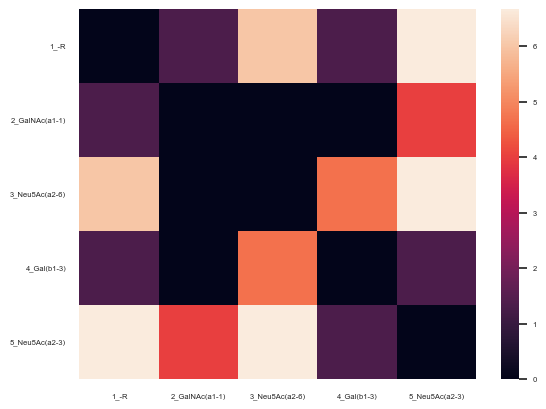

In [69]:
monosaccharide_contact_map(isvt)

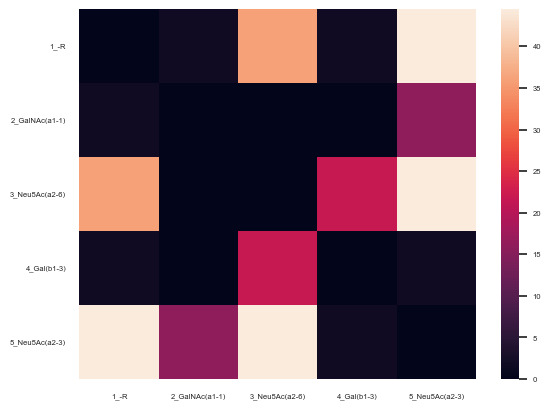

In [70]:
monosaccharide_contact_map(isvt_amplified)

In [ ]:
atom_contact_map(atom_isvt,size =0.2)

In [ ]:
atom_contact_map(atom_isvt_amplified,size =0.2)

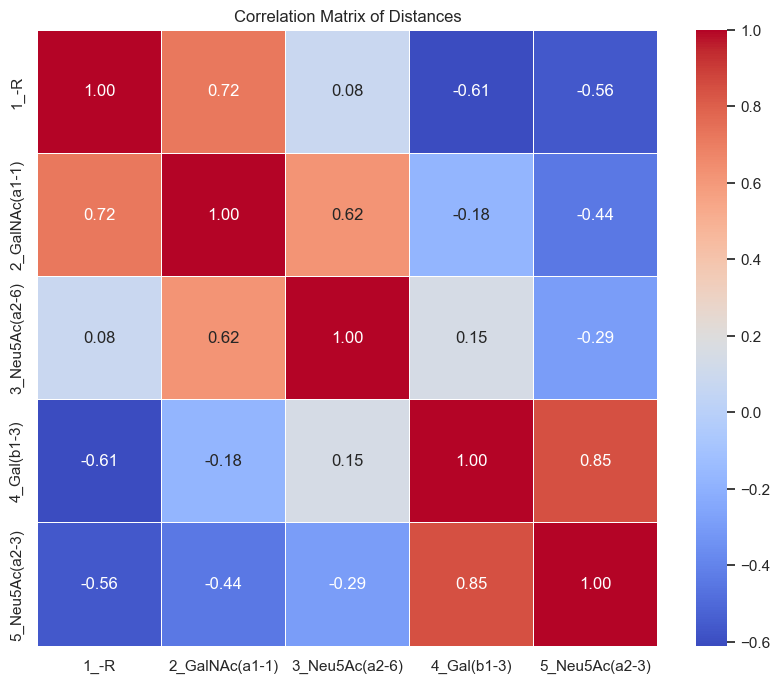

In [72]:
mx = make_correlation_matrix("glycans_pdb/", g, link_type="alpha")
show_correlations(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [10.0, 10.0, 32.5, 32.5]]
dcoord[[0.0, 0.5611377019219845, 0.5611377019219845, 0.0], [0.0, 0.8006487535158385, 0.8006487535158385, 0.0], [0.0, 1.380096105804567, 1.380096105804567, 0.8006487535158385], [0.5611377019219845, 3.8409173632341713, 3.8409173632341713, 1.380096105804567]]
ivl['4_Gal(b1-3)', '5_Neu5Ac(a2-3)', '3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(a1-1)']
leaves[3, 4, 2, 0, 1]
color_list['C1', 'C2', 'C2', 'C0']
leaves_color_list['C1', 'C1', 'C2', 'C2', 'C2']


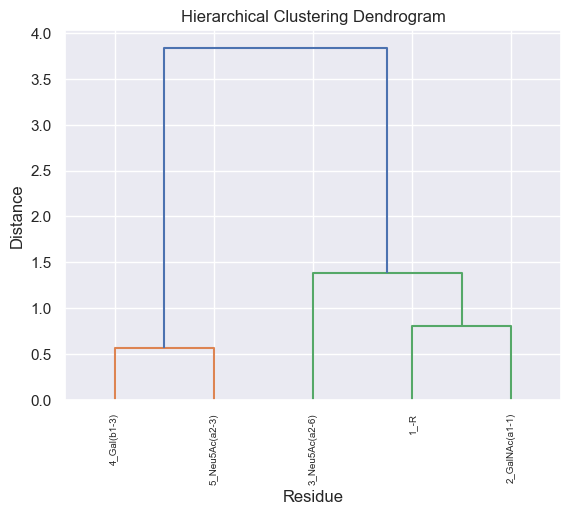

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(a1-1)']}

In [73]:
show_correlation_dendrogram(mx, font_size = 7)

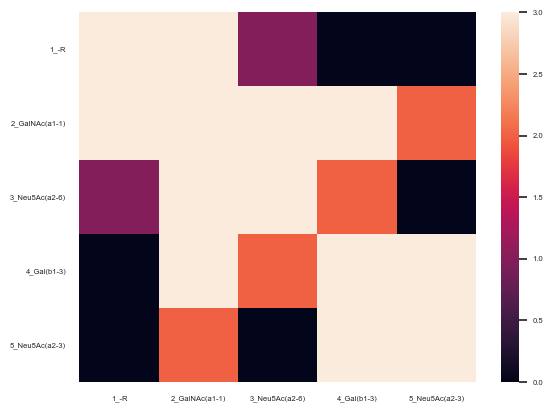

In [75]:
isft = inter_structure_frequency_table("glycans_pdb/", g, link_type="alpha")
monosaccharide_contact_map(isft)

In [79]:
#beta
alpha_pdbs = [pdb for pdb in pdbs if 'beta' in pdb]


# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df, _ = annotation_pipeline("glycans_pdb/"+g+"/"+f, g, threshold=3.5)#=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    atom_dist_table = make_atom_contact_table(df,mode='inclusive', threshold = 200)
    dfs.append(dist_table)
    atom_dfs.append(atom_dist_table)

# from the contact maps, compute standard and amplified inter-structure variability tables
isvt_amplified = inter_structure_variability_table("glycans_pdb/", g, link_type="alpha", mode='amplify')
isvt = inter_structure_variability_table("glycans_pdb/", g, link_type="alpha")

#atom_isvt_amplified = inter_structure_variability_table(atom_dfs, 'amplify')
#atom_isvt = inter_structure_variability_table(atom_dfs)

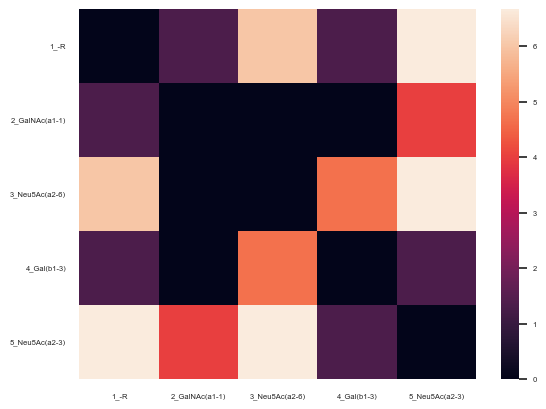

In [80]:
monosaccharide_contact_map(isvt)

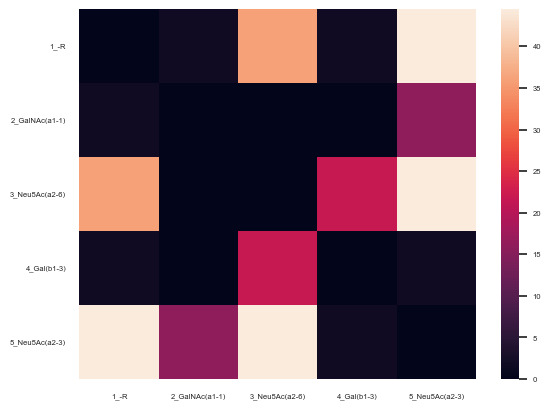

In [81]:
monosaccharide_contact_map(isvt_amplified)

In [ ]:
atom_contact_map(atom_isvt,size =0.2)

In [ ]:
atom_contact_map(atom_isvt_amplified,size =0.2)

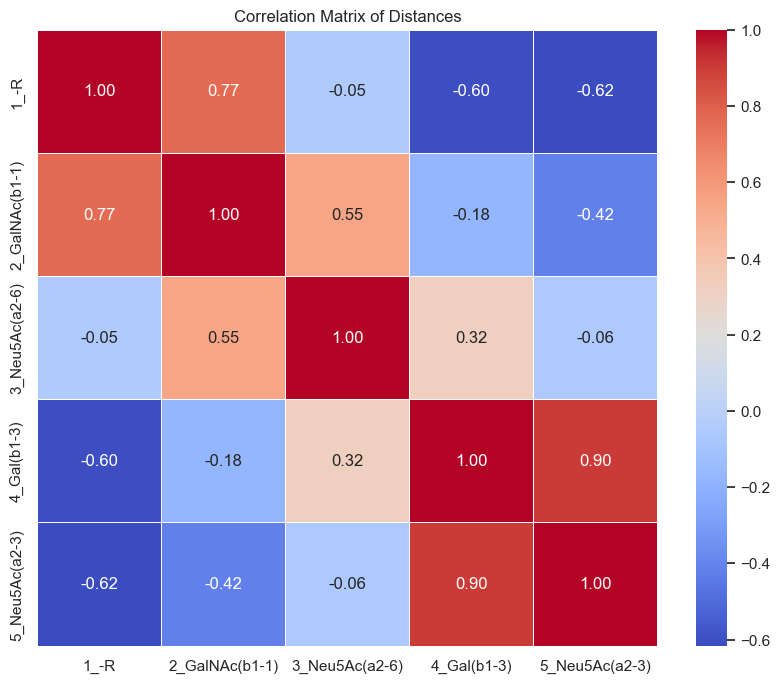

In [82]:
mx = make_correlation_matrix("glycans_pdb/", g, link_type="beta")
show_correlations(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [10.0, 10.0, 32.5, 32.5]]
dcoord[[0.0, 0.47487856351221003, 0.47487856351221003, 0.0], [0.0, 0.830215050781801, 0.830215050781801, 0.0], [0.0, 1.7387890085375677, 1.7387890085375677, 0.830215050781801], [0.47487856351221003, 3.6735898029431793, 3.6735898029431793, 1.7387890085375677]]
ivl['4_Gal(b1-3)', '5_Neu5Ac(a2-3)', '3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']
leaves[3, 4, 2, 0, 1]
color_list['C1', 'C2', 'C2', 'C0']
leaves_color_list['C1', 'C1', 'C2', 'C2', 'C2']
{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'], 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}


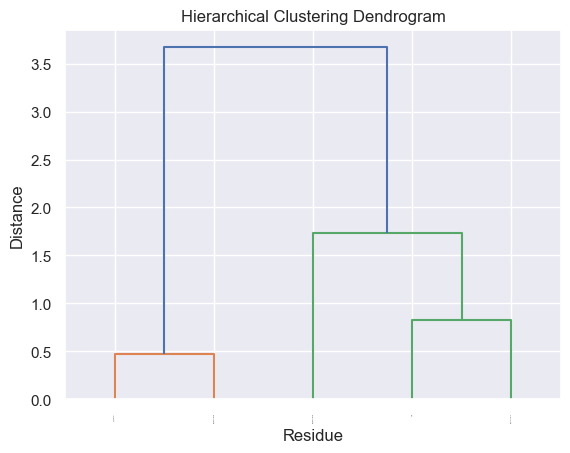

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}

In [83]:
def show_correlation_dendrogram(corr_df, font_size = 1):
    ### Create a hierarchical clustering dendrogram from a correlation matrix as dataframe (corr_df)
    
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    dendrogram = hierarchy.dendrogram(hierarchy.linkage(corr_df.values, method='ward'),
                                    labels=corr_df.columns,
                                    leaf_rotation=90,
                                    leaf_font_size=8,ax=ax
                                    )
    for d in dendrogram :
        print(d + str(dendrogram[d]))
    monolist = dendrogram['ivl']
    clustlist = dendrogram['leaves_color_list']
    uniclustlist =list(set(clustlist))
    res_dict = {}
    #Create a dict with the correlated clusters (=colors on dendrogram) --> 3D regions of glycans highly correlated 
    for c in uniclustlist :
        res_dict[c] = []
    for x in range(0,len(monolist)):
        res_dict[clustlist[x]].append(monolist[x])
    print(res_dict)
    ax.tick_params(axis='x', which='major', labelsize=font_size)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Residue')
    plt.ylabel('Distance')
    plt.show()
    return(res_dict)

show_correlation_dendrogram(mx)

icoord[[5.0, 5.0, 15.0, 15.0], [35.0, 35.0, 45.0, 45.0], [25.0, 25.0, 40.0, 40.0], [10.0, 10.0, 32.5, 32.5]]
dcoord[[0.0, 0.47487856351221003, 0.47487856351221003, 0.0], [0.0, 0.830215050781801, 0.830215050781801, 0.0], [0.0, 1.7387890085375677, 1.7387890085375677, 0.830215050781801], [0.47487856351221003, 3.6735898029431793, 3.6735898029431793, 1.7387890085375677]]
ivl['4_Gal(b1-3)', '5_Neu5Ac(a2-3)', '3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']
leaves[3, 4, 2, 0, 1]
color_list['C1', 'C2', 'C2', 'C0']
leaves_color_list['C1', 'C1', 'C2', 'C2', 'C2']
{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'], 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}


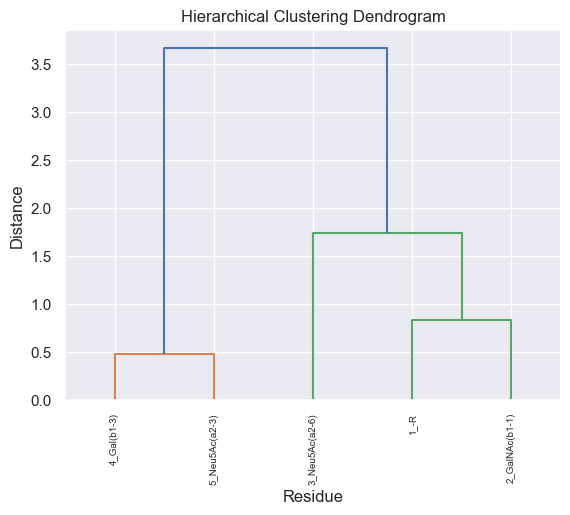

{'C1': ['4_Gal(b1-3)', '5_Neu5Ac(a2-3)'],
 'C2': ['3_Neu5Ac(a2-6)', '1_-R', '2_GalNAc(b1-1)']}

In [84]:
show_correlation_dendrogram(mx, font_size = 7)

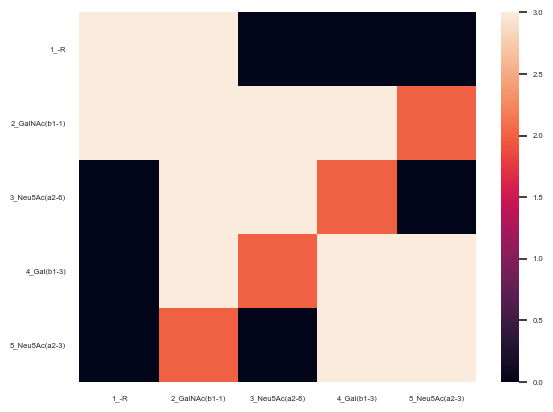

In [85]:
isft = inter_structure_frequency_table("glycans_pdb/", g, link_type="beta")
monosaccharide_contact_map(isft)

## Pipeline idea: Analysis of a set of glycans from the same topological group --> make a dendrogram and extract clusters from these glycans
## --> save a dict named according to the glyco-silhouette and containing the different clusters as well as their content

# Try a pipeline using a2-3 and a2-6 Neu5Ac()

In [ ]:
success_list = success_df['glycan'].to_list()
to_process_list = []
for g in success_list :
    if 'a2-3' in g and 'a2-6' in g : 
        to_process_list.append(g)

print(to_process_list)

In [ ]:
#manual to_process_list
to_process_list = ['Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                   'Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc']

In [ ]:
g = to_process_list[10]
#g = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
pdbs = check_available_pdb("glycans_pdb/"+g)
#alpha_pdbs = [pdb for pdb in pdbs if 'beta' in pdb]
alpha_pdbs = [pdb for pdb in pdbs if 'alpha' in pdb]

# read all structures and get contact maps
dfs = []
atom_dfs = []
for f in alpha_pdbs :
    df = explore_threshold("glycans_pdb/"+g+"/"+f,g, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs.append(dist_table)


In [ ]:
g

In [ ]:
isft = inter_structure_frequency_table(dfs, threshold = 7)
monosaccharide_contact_map(isft)

In [ ]:
isft

In [ ]:
isvt = inter_structure_variability_table(dfs, mode = 'amplify')
monosaccharide_contact_map(isvt)

In [ ]:
mx = make_correlation_matrix(dfs)
show_correlations(mx)

In [ ]:
show_correlation_dendrogram(mx, font_size = 7)

In [ ]:
residue_overall_stability = {}
for c in isvt.columns.to_list():
    residue_overall_stability[c] = sum(isvt[c].to_list())

sorted_residue_overall_stability = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability)

In [ ]:
### BETA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g+'monosaccharide_instabilities.pdf')

plt.show()

In [ ]:
### ALPHA
labels, values = zip(*sorted_residue_overall_stability)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g+'alpha_monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g+'alpha_monosaccharide_instabilities.pdf')

plt.show()

# Investigation of failing glycans

In [ ]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='pdb__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

In [ ]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='_UnexpectedMonosaccharide_CannotBuild'].to_list() #1
for gly in g :
    print(gly)


In [ ]:
g = unsuccess_df["glycan"][unsuccess_df['success']=='__CannotBuild'].to_list() #1
for gly in g :
    print(gly)

In [ ]:

#Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc --> weird structure on Glycoshape

In [80]:




def annotation_pipeline(pdb_file, glycan,threshold =2.7) :
  ### Huge function combining all smaller ones required to annotate a PDB file into IUPAC nomenclature, ensuring that the conversion is correct
  ### It allows also to determine if PDB to IUPAC conversion at the monosaccharide level works fine

  ### Extract glycan sequence from filename
  #glycan_sequence = get_glycan_sequence_from_path(pdb_file)
  glycan_sequence = glycan
  n_glycan = False
  if 'Man(b1-4)GlcNAc(b1-4)' in glycan :
    n_glycan = True
  #print(glycan_sequence)

  ### Using glycowork, extract valid fragments (fragment = monolink like GlcNAc(b1-4))
  valid_fragments = [x.split(')')[0]+')' for x in link_find(glycan_sequence)]
  #print(valid_fragments)

  ### Detect binary connections (covalent linkages) using a maximal distance threshold and valid_fragments + build a mapping dictionnary
  res = extract_binary_interactions_from_PDB(pdb_file,threshold)
  mapping_dict, interaction_dict = create_mapping_dict_and_interactions(res,valid_fragments, n_glycan)
  print(mapping_dict)
  print(interaction_dict)
  #print(len(mapping_dict))
  #print(len(interaction_dict))

  ### Comparison of glycowork linkages and glycontact linkages to ensure correct extraction from PDB
  # Extract glycowork interactions:
  graph_output = glycan_to_graph(glycan_sequence)
  interactions_with_labels = extract_binary_glycowork_interactions(graph_output)
  print(interactions_with_labels)

  # Extract glycontact interactions:
  result_list = extract_binary_glycontact_interactions(interaction_dict)
  print("result list (binary interactions):" + str(result_list))
  
  # Compare glycowork IUPAC to graph versus glycontact PDB to graph to ensure glycontact detection of covalent linkages is correct (must return True)
  glycowork_glycontact_agree, interactions_with_labels = glycowork_vs_glycontact_interactions(interactions_with_labels, result_list)
  if glycowork_glycontact_agree == True :
    print("glycowork and glycontact agree on the list of covalent linkages")

    if check_reconstructed_interactions(interaction_dict) == True :
      print("Building a network from glycontact interactions generate a single molecule, as expected")

      ### When everything is validated: Annotation including correction of GalNAc annotated as GLC
      df = correct_dataframe(extract_3D_coordinates(pdb_file))
      result_df = annotate_pdb_data(df, mapping_dict)

    else :
      print("Although the fragments building binary interactions seem fine, some interactions are missed resulting in the reconstruction of multiple submolecules")
      return(pd.DataFrame())
  else :
    print("glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages")
    return(pd.DataFrame())
  return(result_df)

def explore_threshold(pdb_file, glycan, threshold_list=[2.2,2.4,2.5,2.6,2.7,2.8,2.9,2.25,2.45,2.55,2.65,2.75,2.85,2.95,3]):
  # Apply the annotation pipeline with different threshold, and return a correct df if found

  completed = False
  for x in threshold_list :
    print('threshold:' + str(x))
    res = annotation_pipeline(pdb_file,glycan,x)
    if len(res) != 0 :
      completed = True
      return(res)
  if completed == False :
    print('None of these thresholds allows to correctly annotate your PDB file:' + str(threshold_list))
    return(pd.DataFrame())
  


In [ ]:
def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    coordinates_df =  correct_dataframe(extract_3D_coordinates(pdb_file))
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}

    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    return interactions_df

In [ ]:
def create_mapping_dict_and_interactions(df, valid_fragments) :
  #df is an interaction dataframe as returned by extract_binary_interactions_from_PDB()
  # valid_fragments : obtained from glycowork to ensure that we only append valid monolinks into mapping dict
  mapping_dict = {}
  interaction_dict = {}
  interaction_dict2 = {}
  first_mono_list = df['Atom'].to_list()
  second_mono_list = df['Column'].to_list()
  mapping_dict['1_ROH']='-R'
  wrong_mannose = []
  individual_entities = []

  for m in range(0,len(first_mono_list)) :

    mono = first_mono_list[m].replace("_"+first_mono_list[m].split('_')[-1],'')
    second_mono = second_mono_list[m].replace("_"+second_mono_list[m].split('_')[-1],'')
    first_val = first_mono_list[m].split('_')[-1]
    first_val = extract_numbers(first_val)
    last_val = extract_numbers(second_mono_list[m].split('_')[-1])
    if mono not in individual_entities:
      individual_entities.append(mono)
    if second_mono not in individual_entities:
      individual_entities.append(second_mono)

    if mono.split('_')[1] + '(' + first_val + '-' + last_val + ')' == "MAN(1-4)":
      wrong_mannose.append(mono)

    if second_mono in wrong_mannose :
      second_mono = second_mono.split('_')[0]+"_BMA"

    if mono in wrong_mannose :
      mono = mono.split('_')[0]+"_BMA"
    mapped_to_check = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    #print("mapped_to_check:" + str(mapped_to_check))

    if mapped_to_check in valid_fragments :
      mapping_dict[mono] = PDB_to_IUPAC(mono) + first_val + '-' + last_val + ')'
    if mapped_to_check == 'Man(a1-4)':
      mapping_dict[mono] = 'Man(b1-4)'
    if mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check == '-R' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
      mapping_dict[mono] = mapped_to_check


    if mono in interaction_dict :
      if second_mono not in interaction_dict[mono] :
        interaction_dict[mono].append(second_mono)
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']
        interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono] #added but eventually wrong, make everything else fail later
    if mono not in interaction_dict :
      if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
        interaction_dict[mono] = [second_mono]
        interaction_dict2[mono] = [mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')']

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'].append(second_mono)

      if mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')' not in interaction_dict2 :
        if mapped_to_check in valid_fragments or mapped_to_check == 'Man(a1-4)' or mapped_to_check == '-R' or mapped_to_check == 'GlcNAc(a1-1)' or mapped_to_check == 'GlcNAc(b1-1)' or mapped_to_check =='GalNAc(a1-1)' or mapped_to_check == 'GalNAc(b1-1)' or mapped_to_check =='Glc(a1-1)' or mapped_to_check == 'Glc(b1-1)' or mapped_to_check =='Rha(a1-1)' or mapped_to_check == 'Rha(b1-1)' or mapped_to_check =='Neu5Ac(a1-1)' or mapped_to_check == 'Neu5Ac(b1-1)' or mapped_to_check =='Man(a1-1)' or mapped_to_check == 'Man(b1-1)' or mapped_to_check =='Gal(a1-1)' or mapped_to_check == 'Gal(b1-1)' or mapped_to_check =='Fuc(a1-1)' or mapped_to_check == 'Fuc(b1-1)' or mapped_to_check =='Xyl(a1-1)' or mapped_to_check == 'Xyl(b1-1)' or mapped_to_check =='GlcA(a1-1)' or mapped_to_check == 'GlcA(b1-1)':
          interaction_dict2[mono.split('_')[0]+'_(' + PDB_to_IUPAC(mono).split('(')[1] + first_val + '-' + last_val + ')'] = [second_mono]

  return(mapping_dict, interaction_dict2)

In [ ]:
def glycowork_vs_glycontact_interactions(glycowork_interactions, glycontact_interactions) :
  # Take two sets of binary interactions to compare them and return any difference other than GlcNAc-a1-1 and a1-1-R (only considered by glycontact)

  # Convert the lists to sets for easy comparison
  result_set = set(glycontact_interactions)
  interactions_set = set(glycowork_interactions)

  # Calculate the differences
  differences = result_set.symmetric_difference(interactions_set)

  # Convert the differences set back to a list of tuples
  differences_list = list(differences)

  # Pairs to be ignored because specific to glycontact
  ignore_pairs = {('GlcNAc', 'a1-1'), ('a1-1', ' '),('GlcNAc', 'b1-1'), ('b1-1', ' '), ('GalNAc', 'a1-1'), ('GalNAc', 'b1-1'), ('Glc', 'a1-1'), ('Glc', 'b1-1'), ('Rha', 'b1-1'), ('Rha', 'a1-1'), ('Neu5Ac', 'b1-1'), ('Neu5Ac', 'a1-1'), ('Man', 'b1-1'), ('Man', 'a1-1'), ('Gal', 'b1-1'), ('Gal', 'a1-1'), ('Fuc', 'b1-1'), ('Fuc', 'a1-1'), ('Xyl', 'b1-1'), ('Xyl', 'a1-1'), ('GlcA', 'a1-1'), ('GlcA', 'b1-1')}

  # Filter out pairs to be ignored
  filtered_differences = [pair for pair in differences_list if pair not in ignore_pairs]

  # Print or use the filtered_differences as needed
  #print("Filtered Differences:", filtered_differences)
  if filtered_differences == [] and  (len(glycontact_interactions) > len(glycowork_interactions)):
    return(True)
  else :
    if filtered_differences != [] :
      #print('Differences in annotations')
      #print(glycowork_interactions)
      #print(glycontact_interactions)
      return(False)
    if (len(glycontact_interactions) <= len(glycowork_interactions)) :
      #print("Missing monosaccharide in mapping_dict")
      return(False)

In [ ]:
def correct_dataframe(df):
  #Correct an annotated dataframe, transforming unexpected GLC into GalNAc based on the number of C atom they contain
  ### WARNING: this is a modified version of the function, assuming that it is always GalNAc(b which is wrong, which might be a wrong assomption
  resnum = list(set(df['residue_number'].tolist()))

  #Correcting GLC to GalNAc
  for x in resnum:
    #Correcting GLC to GalNAc
    condition = (df['monosaccharide'] == 'GLC') & (df['residue_number'] == x) & (df[(df['residue_number'] == x) & (df['element'] == 'C')]['element'].count() >= 7)

    if condition.any():
        print(len(df[df['residue_number'] == x]))
        df.loc[condition, 'monosaccharide'] = df.loc[condition, 'monosaccharide'].map(lambda x: x.replace('GLC', 'NGA'))

  return df

In [ ]:
glycan = "Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"

#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

In [ ]:
mono = df['monosaccharide'].to_list()
IUPAC = df['IUPAC'].to_list()

for x in range(0,len(mono)):
    print(mono[x],IUPAC[x])

In [ ]:
print(df['atom_number'][0])

In [ ]:
df2 = extract_3D_coordinates(pdb_file)

In [ ]:
dist_table = make_monosaccharide_contact_table(df,mode='distance')
monosaccharide_contact_map(dist_table)

# Working on Modified (sulfated...) glycans

In [19]:
glycan = "GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS"
#successfull glycan : Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

pdb_path = "glycans_pdb/"+glycan
pdbs = check_available_pdb(pdb_path)

pdb_file = pdb_path + "/" + pdbs[0]
print(pdb_file)
#df = explore_threshold(pdb_file, glycan, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
  

glycans_pdb/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS_beta_5.pdb


In [20]:
df2 = extract_3D_coordinates(pdb_file)
print(list(set(df2['monosaccharide'].to_list())))

['ROH', '4YS', 'BDP', 'SO3']


In [21]:
### Strat: detect which component are not monosaccharides.
### For each of them, detect the closest monosaccharide.
### Detect the type of linkage between monosaccharide and modification (to know if it is 6S, 3S...)
### Annotate each non-monosaccharide and its linked monosaccharide with custom annotation in monosaccharide column
### GlcNAc6S : NAG + SO3 + C6-S1 linkage : NAG6S (residue_number = monosaccharide residue number)

# In pipeline, if IUPAC is detected as containing modified monosaccharide, pre-step of annotation of pdbfile
modified_mono = ["GlcNAc6S", "GalNAc4S", "IdoA2S", "GlcA3S", "GlcA2S", "Neu5Ac9Ac", 
                 "Man3Me", "Neu5Ac9Me", "Neu5Gc9Me", "GlcA4Me", "Gal6S", "GlcNAc6Pc",
                 "GlcNS6S"
                 ]
### note: GalNAcXS will be annotated as GLC as well, so I need to correct it as well

# List of non-monosaccharide
non_mono_list=['SO3', 'ACX', 'MEX', 'PCX']

# Dict of modifications {link_modif:IUPAC} 
#modif_dict = {"6SO3":"6S"} #--> allows to write GlcNAc

# Custom PDB codes to IUPAC (check GLC/GalNAc thingy)
custom_pdb = {"NAG6SO3":"GlcNAc6S", "NDG6SO3":"GlcNAc6S", "GLC4SO3":"GalNAc4S", "IDR2SO3":"IdoA2S", 
              "BDP3SO3":"GlcA3S", "BDP2SO3":"GlcA2S", "SIA9ACX":"Neu5Ac9Ac", "MAN3MEX":"Man3Me", 
              "SIA9MEX":"Neu5Ac9Me", "NGC9MEX":"Neu5Gc9Me", "BDP4MEX":"GlcA4Me", "GAL6SO3":"Gal6S", 
              "NAG6PCX":"GlcNAc6Pc", "UYS6SO3":"GlcNS6S", "4YS6SO3":"GlcNS6S", "6YS6SO3":"GlcNS6S"}

# To modify dict
to_modify_dict = {}

modified_glycan = False 
for mm in modified_mono :
    if mm in glycan : 
        modified_glycan = True

if modified_glycan == True :
    pdb_path = "glycans_pdb/"+glycan
    pdbs = check_available_pdb(pdb_path)

    pdb_file = pdb_path + "/" + pdbs[0]
    print(pdb_file)

    df = extract_3D_coordinates(pdb_file)

    #list of residue_number
    resnum = list(set(df.residue_number.to_list()))
    resdict = {}
    for x in resnum :
        mono = list(set(df['monosaccharide'][df['residue_number']==x].to_list()))[0]
        resdict[x] = mono
    print(resdict)

    #make an atomic distance table
    dist_table = make_atom_contact_table(df)

    #For each element in resdict, those that are non-monosaccharide must be investigated
    for key in resdict :
        val = resdict[key]
        if val in non_mono_list :
            element = str(key) + "_" + val
            contact_table = dist_table.filter(regex=element) #keep only columns with a given non-monosaccharide
            
            mask = ~contact_table.index.str.contains('|'.join(contact_table.columns))
            contact_table = contact_table.loc[mask] #keep only lines without this given non-monosaccharide
            
            split_index = contact_table.index.str.split('_')

            # créer un masque pour filtrer les lignes dont le troisième élément ne contient pas "H"
            mask = ['H' not in x[2] for x in split_index]

            # filtrer les lignes de la dataframe en utilisant le masque
            filtered_table = contact_table.loc[mask]

            partners = filtered_table[filtered_table != 0].stack().idxmin() #valeur non nulle la plus faible de la dataframe
            sugar_partner = partners[0]
            print(sugar_partner)

            #get monosaccharide resnum and non-mono resnum to give them mono resnum but custom monosaccharide annotation
            sugar_resnum, sugar, atom, atom_num = sugar_partner.split("_")
            #link_pos = str([''.join(c for c in s if c.isdigit()) for s in atom][-1])
            link_pos = str(re.findall(r'\d+', atom)[0])
            modif = link_pos+val
            modified_mono = sugar + modif 
            modified_mono_iupac = custom_pdb[modified_mono]


            print(link_pos)
            print(modif)
            print(modified_mono)
            print(modified_mono_iupac)
            print("stop")

            #List all resnum lines that will require modification and which modif
            to_modify_dict[int(sugar_resnum)] =  modified_mono
            to_modify_dict[key] =  [modified_mono, sugar_resnum]

print(to_modify_dict)


# charger la dataframe à partir du fichier file.pdb
df = extract_3D_coordinates(pdb_file)

# parcourir chaque ligne de la dataframe et appliquer les règles
for index, row in df.iterrows():
    residue_number = row['residue_number']
    if residue_number in to_modify_dict:
        if type(to_modify_dict[residue_number]) is str : 
            monosaccharide = to_modify_dict[residue_number]
            print(monosaccharide)
            df.at[index, 'monosaccharide'] = monosaccharide
        
        if type(to_modify_dict[residue_number]) is list:
            monosaccharide = to_modify_dict[residue_number][0]
            print(monosaccharide)
            df.at[index, 'monosaccharide'] = monosaccharide
            new_residue_number = int(to_modify_dict[residue_number][1])
            df.at[index, 'residue_number'] = new_residue_number

# conserver la dataframe modifiée en variable
df_modified = df.copy()
new_df= df_modified.sort_values(by='residue_number', key=lambda x: x.astype(int))

# afficher le résultat
##print("Nom de la colonne :", col_name)
#print("Index de la ligne :", row_index)


        




glycans_pdb/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS/GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS_beta_5.pdb
{1: 'ROH', 2: '4YS', 3: 'BDP', 4: '4YS', 5: 'BDP', 6: 'SO3'}
3_BDP_O2_45
2
2SO3
BDP2SO3
GlcA2S
stop
{3: 'BDP2SO3', 6: ['BDP2SO3', '3']}
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3
BDP2SO3


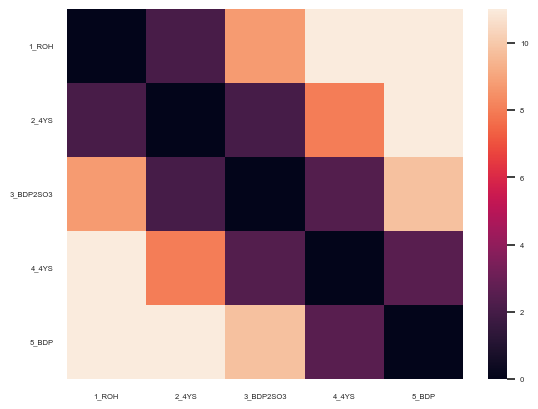

In [22]:
dist_table = make_monosaccharide_contact_table(new_df, mode="distance")
monosaccharide_contact_map(dist_table)

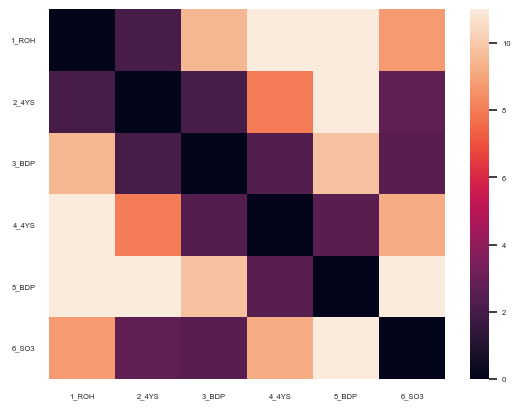

In [23]:
dist_table = make_monosaccharide_contact_table(df2, mode="distance")
monosaccharide_contact_map(dist_table)

In [ ]:
dist_table = make_atom_contact_table(new_df)
monosaccharide_contact_map(dist_table)

In [ ]:
dist_table = make_atom_contact_table(df2)
monosaccharide_contact_map(dist_table)

# New annotation pipeline

## Continue here, check why some are still failing with modified monosacs

In [52]:

def extract_binary_interactions_from_PDB(coordinates_df, threshold):
    """
    Extract binary interactions between C1-2 atoms and oxygen atoms from a DataFrame.

    Parameters:
    - coordinates_df (pd.DataFrame): DataFrame obtained using extract_3D_coordinates.
    - threshold (float): Distance threshold for considering interactions.

    Returns:
    - pd.DataFrame: DataFrame with columns 'Atom', 'Column', and 'Value' representing interactions.
    """
    carbon_1_2_df = coordinates_df[(coordinates_df['atom_name'] == 'C1') | (coordinates_df['atom_name'] == 'C2')]
    oxygen_df = coordinates_df[coordinates_df['element'] == 'O']

    c_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in carbon_1_2_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}
    o_dict = {f"{r}_{m}_{a}": [x, y, z] for r, m, a, x, y, z in oxygen_df[['residue_number', 'monosaccharide', 'atom_name', 'x', 'y', 'z']].values}

    atom = []
    column = []
    value = []

    for c_key, c_coords in c_dict.items():
        smallest_distance = 1000
        closest_residue = ''
        c_resnum = c_key.split('_')[0]

        for o_key, o_coords in o_dict.items():
            o_resnum = o_key.split('_')[0]

            if c_resnum != o_resnum:
                sum_dist = np.sum(np.abs(np.array(c_coords) - np.array(o_coords)))

                if sum_dist < smallest_distance:
                    smallest_distance = sum_dist
                    closest_residue = o_key

        if smallest_distance < threshold:
            atom.append(c_key)
            column.append(closest_residue)
            value.append(smallest_distance)

    interactions_df = pd.DataFrame({'Atom': atom, 'Column': column, 'Value': value})
    print(interactions_df)
    return interactions_df

def annotate_pdb_data(pdb_dataframe, mapping_dict) :
  mono_list = pdb_dataframe['monosaccharide'].to_list()
  id_list = pdb_dataframe['residue_number'].to_list()
  m_dict = copy.deepcopy(mapping_dict)
  for m in m_dict :
    if "BMA" in m :
      mapping_dict[m.split('_')[0]+"_"+"MAN"] = mapping_dict[m] #restore the corrected mannose into a wrong one for annotation
  IUPAC = []
  for m in range(0,len(mono_list)):
    monosaccharide = str(id_list[m]) + "_" + mono_list[m]
    try :
      IUPAC.append(mapping_dict[monosaccharide])
    except :
      IUPAC.append(mono_list[m])
  pdb_dataframe['IUPAC']= IUPAC
  return(pdb_dataframe)

def correct_dataframe(df):
  #Correct an annotated dataframe, transforming unexpected GLC into GalNAc based on the number of C atom they contain
  ### WARNING: this is a modified version of the function, assuming that it is always GalNAc(b which is wrong, which might be a wrong assomption
  resnum = list(set(df['residue_number'].tolist()))

  for x in resnum:
    #Correcting GLC to GalNAc
    condition = (df['monosaccharide'] == 'GLC') & (df['residue_number'] == x) & (df[(df['residue_number'] == x) & (df['element'] == 'C')]['element'].count() >= 7)

    if condition.any():
        print(len(df[df['residue_number'] == x]))
        df.loc[condition, 'monosaccharide'] = df.loc[condition, 'monosaccharide'].map(lambda x: x.replace('GLC', 'NGA'))

  return df

def annotation_pipeline(pdb_file, glycan,threshold =2.7) :
  ### Huge function combining all smaller ones required to annotate a PDB file into IUPAC nomenclature, ensuring that the conversion is correct
  ### It allows also to determine if PDB to IUPAC conversion at the monosaccharide level works fine


  # In pipeline, if IUPAC is detected as containing modified monosaccharide, pre-step of annotation of pdbfile
  modified_mono = ["GlcNAc6S", "GalNAc4S", "IdoA2S", "GlcA3S", "GlcA2S", "Neu5Ac9Ac", 
                  "Man3Me", "Neu5Ac9Me", "Neu5Gc9Me", "GlcA4Me", "Gal6S", "GlcNAc6Pc",
                  "GlcNS6S"
                  ]
  ### note: GalNAcXS will be annotated as GLC as well, so I need to correct it as well

  # List of non-monosaccharide
  non_mono_list=['SO3', 'ACX', 'MEX', 'PCX']

  # Dict of modifications {link_modif:IUPAC} 
  #modif_dict = {"6SO3":"6S"} #--> allows to write GlcNAc

  # Custom PDB codes to IUPAC (check GLC/GalNAc thingy)
  custom_pdb = {"NAG6SO3":"GlcNAc6S", "NDG6SO3":"GlcNAc6S", "GLC4SO3":"GalNAc4S", "IDR2SO3":"IdoA2S", 
                "BDP3SO3":"GlcA3S", "BDP2SO3":"GlcA2S", "SIA9ACX":"Neu5Ac9Ac", "MAN3MEX":"Man3Me", 
                "SIA9MEX":"Neu5Ac9Me", "NGC9MEX":"Neu5Gc9Me", "BDP4MEX":"GlcA4Me", "GAL6SO3":"Gal6S", 
                "NAG6PCX":"GlcNAc6Pc", "UYS6SO3":"GlcNS6S", "4YS6SO3":"GlcNS6S", "6YS6SO3":"GlcNS6S"}
  
  ### Extract glycan sequence from filename
  #glycan_sequence = get_glycan_sequence_from_path(pdb_file)
  glycan_sequence = glycan
  #print(glycan_sequence)


  # To modify dict
  to_modify_dict = {}

  df = extract_3D_coordinates(pdb_file)

  modified_glycan = False 
  for mm in modified_mono :
      if mm in glycan_sequence : 
          modified_glycan = True

  if modified_glycan == True :
    print("MODIFIED GLYCAN")

    

    #list of residue_number
    resnum = list(set(df.residue_number.to_list()))
    resdict = {}
    for x in resnum :
        mono = list(set(df['monosaccharide'][df['residue_number']==x].to_list()))[0]
        resdict[x] = mono


    #make an atomic distance table
    dist_table = make_atom_contact_table(df)

    #For each element in resdict, those that are non-monosaccharide must be investigated
    for key in resdict :
        val = resdict[key]
        if val in non_mono_list :
            element = str(key) + "_" + val
            contact_table = dist_table.filter(regex=element) #keep only columns with a given non-monosaccharide
            
            mask = ~contact_table.index.str.contains('|'.join(contact_table.columns))
            contact_table = contact_table.loc[mask] #keep only lines without this given non-monosaccharide
            
            split_index = contact_table.index.str.split('_')

            # créer un masque pour filtrer les lignes dont le troisième élément ne contient pas "H"
            mask = ['H' not in x[2] for x in split_index]

            # filtrer les lignes de la dataframe en utilisant le masque
            filtered_table = contact_table.loc[mask]

            partners = filtered_table[filtered_table != 0].stack().idxmin() #valeur non nulle la plus faible de la dataframe
            sugar_partner = partners[0]

            #get monosaccharide resnum and non-mono resnum to give them mono resnum but custom monosaccharide annotation
            sugar_resnum, sugar, atom, atom_num = sugar_partner.split("_")
            #link_pos = str([''.join(c for c in s if c.isdigit()) for s in atom][-1])
            link_pos = str(re.findall(r'\d+', atom)[0])
            modif = link_pos+val
            modified_mono = sugar + modif 
            modified_mono_iupac = custom_pdb[modified_mono]

            #print(link_pos)
            #print(modif)
            #print(modified_mono)
            #print(modified_mono_iupac)

            #List all resnum lines that will require modification and which modif
            to_modify_dict[int(sugar_resnum)] =  modified_mono
            to_modify_dict[key] =  [modified_mono, sugar_resnum]




    # charger la dataframe à partir du fichier file.pdb
    df = extract_3D_coordinates(pdb_file)

    # parcourir chaque ligne de la dataframe et appliquer les règles
    for index, row in df.iterrows():
        residue_number = row['residue_number']
        if residue_number in to_modify_dict:
            if type(to_modify_dict[residue_number]) is str : 
                monosaccharide = to_modify_dict[residue_number]
                df.at[index, 'monosaccharide'] = monosaccharide
            
            if type(to_modify_dict[residue_number]) is list:
                monosaccharide = to_modify_dict[residue_number][0]
                df.at[index, 'monosaccharide'] = monosaccharide
                new_residue_number = int(to_modify_dict[residue_number][1])
                df.at[index, 'residue_number'] = new_residue_number

    # conserver la dataframe modifiée en variable
    df_modified = df.copy()
    df= df_modified.sort_values(by='residue_number', key=lambda x: x.astype(int))

  
  ### Using glycowork, extract valid fragments (fragment = monolink like GlcNAc(b1-4))
  valid_fragments = [x.split(')')[0]+')' for x in link_find(glycan_sequence)]
  print(valid_fragments)
  print(list(set(df['monosaccharide'].to_list())))
  ### Detect binary connections (covalent linkages) using a maximal distance threshold and valid_fragments + build a mapping dictionnary
  res = extract_binary_interactions_from_PDB(df,threshold)
  print("BinInt Extracted --->>><<<")
  mapping_dict, interaction_dict = create_mapping_dict_and_interactions(res,valid_fragments)
  print(mapping_dict)
  print(interaction_dict)
  print(len(mapping_dict))
  print(len(interaction_dict))

  ### Comparison of glycowork linkages and glycontact linkages to ensure correct extraction from PDB
  # Extract glycowork interactions:
  graph_output = glycan_to_graph(glycan_sequence)
  interactions_with_labels = extract_binary_glycowork_interactions(graph_output)
  print(interactions_with_labels)

  # Extract glycontact interactions:
  result_list = extract_binary_glycontact_interactions(interaction_dict)
  print("result list:" + str(result_list))
  # Compare glycowork IUPAC to graph versus glycontact PDB to graph to ensure glycontact detection of covalent linkages is correct (must return True)
  if glycowork_vs_glycontact_interactions(interactions_with_labels, result_list) == True :
    print("glycowork and glycontact agree on the list of covalent linkages")

    if check_reconstructed_interactions(interaction_dict) == True :
      print("Building a network from glycontact interactions generate a single molecule, as expected")

      ### When everything is validated: Annotation including correction of GalNAc annotated as GLC
      df = correct_dataframe(df)
      result_df = annotate_pdb_data(df, mapping_dict)

    else :
      print("Although the fragments building binary interactions seem fine, some interactions are missed resulting in the reconstruction of multiple submolecules")
      return(pd.DataFrame())
  else :
    print("glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages")
    return(pd.DataFrame())
  return(result_df)


def explore_threshold(pdb_file, glycan, threshold_list=[2.2,2.4,2.5,2.6,2.7,2.8,2.9,2.25,2.45,2.55,2.65,2.75,2.85,2.95,3]):
  # Apply the annotation pipeline with different threshold, and return a correct df if found

  completed = False
  for x in threshold_list :
    print('threshold:' + str(x))
    res = annotation_pipeline(pdb_file,glycan,x)
    if len(res) != 0 :
      completed = True
      return(res)
  if completed == False :
    print('None of these thresholds allows to correctly annotate your PDB file:' + str(threshold_list))
    return(pd.DataFrame())

In [53]:
glycan_list = ["Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose","GlcNS(a1-4)IdoA(a1-4)GlcNS(a1-4)GlcA(b1-4)GlcNAc6S(a1-4)GlcA(b1-4)GlcNS6S(a1-4)IdoA2S(a1-4)GlcNAc(a1-4)GlcA",
               "Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc","GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S",
               "GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc4S(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl",
               "GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl","GlcA(b1-3)GalNAc(b1-4)GlcA2S(b1-3)GalNAc4S(b1-4)GlcA(b1-3)GalNAc(b1-4)GlcA(b1-3)Gal(b1-3)Gal(b1-4)Xyl"]



In [54]:
#glycan_list = ['Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc','GlcA(b1-4)GlcNS(a1-4)GlcA2S(b1-4)GlcNS']
success_fail_list = []
x =1

for g_index in range(0,len(glycan_list)) :

    pdb_path = 'glycans_pdb'
    pdbs = check_available_pdb(pdb_path + '/' + glycan_list[g_index])
    success = True 
    pdb_error = ''
    monosac_error = ''
    explore_threshold_error = ''

    #Ensure that at least one pdb file has been downloaded for each glycan
    try :
        pdb_file = pdb_path + '/' + glycan_list[g_index] + "/" + pdbs[0]
    except :
        df = pd.DataFrame()
        pdb_error = 'pdb'

    #Apply PDB->IUPAC conversion, else, assume that it is because of an unexpected monosaccharide
    try :
        print(glycan_list[g_index])
        df = explore_threshold(pdb_file, glycan_list[g_index], threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3,2.2,2.25,2.3,2.35,3.5])
        print("DONE")
    except :
        df = pd.DataFrame()
        monosac_error = 'UnexpectedMonosaccharide'
    
    #Ensure the production of a converted df. 
    try : 
        print(df['atom_number'][0])
    except :
        success = False
        explore_threshold_error = 'CannotBuild'

    errors = pdb_error + '_' + monosac_error + '_' + explore_threshold_error
    
    if errors == '__' :
        errors = 'SUCCESS'
    
    success_fail_list.append(errors)
    x +=1

fdf = pd.DataFrame()
fdf['glycan'] = glycan_list
fdf['success'] = success_fail_list 

Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose
threshold:2.4
['Gal(b1-4)', 'Gal(a1-3)']
['GAL', 'ROH', 'BCA', 'GLA']
       Atom    Column  Value
0  2_BCA_C1  1_ROH_O1  2.346
BinInt Extracted --->>><<<
['2_BCA_C1']
['1_ROH_O1']
2_BCA
1_ROH
C1
1
A
B
mapped_to_check:2-4-diacetimido-2-4-6-trideoxyhexose(a1-1)
['Gal(b1-4)', 'Gal(a1-3)']
{'1_ROH': '-R', '2_BCA': '2-4-diacetimido-2-4-6-trideoxyhexose(a1-1)'}
{'2_BCA': ['2_(a1-1)'], '2_(a1-1)': ['1_ROH']}
2
2
[('Gal', 'b1-4'), ('b1-4', 'Gal'), ('Gal', 'a1-3'), ('a1-3', '2-4-diacetimido-2-4-6-trideoxyhexose')]
result list:[('2-4-diacetimido-2-4-6-trideoxyhexose', 'a1-1'), ('a1-1', ' ')]
glycowork and glycontact do not agree on the list of covalent linkages in this glycan. It is probable that glycontact encountered a problem with PDB monosaccharide conversion, or detecting linkages
threshold:2.5
['Gal(b1-4)', 'Gal(a1-3)']
['GAL', 'ROH', 'BCA', 'GLA']
       Atom    Column  Value
0  2_BCA_C1  1_ROH_O1  2.346
BinInt Extracted --->>><<<
['

In [57]:
fdf['glycan'][fdf['success']=='SUCCESS'].to_list()

['Gal(b1-4)Gal(a1-3)2-4-diacetimido-2-4-6-trideoxyhexose',
 'Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc6S(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
 'GlcA(b1-4)GlcNAc(a1-4)IdoA2S(a1-4)GlcNAc6S',
 'GlcA3S(b1-3)Gal(b1-3)[Neu5Ac(a2-6)]Gal(b1-4)Xyl']

In [ ]:
#drawing publication-quality glycan figures
#!/usr/local/bin/python3.12.1

from glycowork.motif import *
from glycowork.motif.draw import GlycoDraw
GlycoDraw("Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][GlcNAc(b1-4)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc", highlight_motif = "Neu5Ac(a2-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc")

In [ ]:
import MDAnalysis as mda
import mdtraj as md
from mdtraj.core.topology import Topology
from mdtraj.core.trajectory import Trajectory


# Load PDB file
pdb_file = "/Users/lucthomes/Desktop/REPOSITORIES/Glycontact/glycans_pdb/" + g + "/" + pdbs[0]


# Load the PDB file
structure = md.load(pdb_file)

# Calculate SASA
sasa = md.shrake_rupley(structure, mode='atom')

# Print the SASA for each atom
highest = ''
highval = 0
for i, atom_sasa in enumerate(sasa[0]):
    atom = structure.topology.atom(i)
    print(f"Atom {atom.name} ({atom.residue.name} {atom.residue.resSeq}): {atom_sasa} Å²")
    if atom_sasa > highval :
        highval = atom_sasa
        highest = str(atom.name) +'_'+ str(atom.residue.name) + '_' +  str(atom.residue.resSeq)

    



In [ ]:
glycan = 'Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'
res = get_sasa_table(glycan)

In [ ]:
res

In [ ]:



score_list = res['Standard Deviation'].to_list()
plot_glycan_score(glycan, score_list)


In [ ]:
lst = res['Mean Score'].to_list()


In [ ]:
lst = res['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(glycan, per_residue= normalized_lst)

In [ ]:


lst = table['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g, per_residue= normalized_lst)

In [ ]:
GlycoDraw(g, draw_method='chem2d')

In [ ]:
GlycoDraw(g, draw_method='chem2d')

# Test a complete analysis of two given glycans :
- Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
- Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc

In [ ]:
import mdtraj as md
import numpy as np
import pandas as pd

g1 = "Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Ac(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"
g2 = "Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Neu5Gc(a2-6)Gal(b1-4)GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc"

pdbs1 = check_available_pdb("glycans_pdb/"+g1)
pdbs2 = check_available_pdb("glycans_pdb/"+g2)

beta_pdbs1 = [pdb for pdb in pdbs1 if 'beta' in pdb]


beta_pdbs2 = [pdb for pdb in pdbs2 if 'beta' in pdb]


# read all structures and get contact maps
dfs1 = []
atom_dfs1 = []
for f in beta_pdbs1 :
    df = explore_threshold("glycans_pdb/"+g1+"/"+f,g1, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs1.append(dist_table)
mapping_dict1 = df.set_index('residue_number')['IUPAC'].to_dict()


dfs2 = []
atom_dfs2 = []
for f in beta_pdbs2 :
    df = explore_threshold("glycans_pdb/"+g2+"/"+f,g2, threshold_list=[2.4,2.5,2.6,2.7,2.8,2.9,2.45,2.55,2.65,2.75,2.85,2.95,3])
    dist_table = make_monosaccharide_contact_table(df,mode='distance', threshold = 200)
    dfs2.append(dist_table)
mapping_dict2 = df.set_index('residue_number')['IUPAC'].to_dict()


In [ ]:
# Need for weighted analyzes based on cluster frequencies

isft1 = inter_structure_frequency_table(dfs1, threshold = 3)
monosaccharide_contact_map(isft1)

In [ ]:
isft2 = inter_structure_frequency_table(dfs2, threshold = 3)
monosaccharide_contact_map(isft2)

In [ ]:
isvt1 = inter_structure_variability_table(dfs1, mode = 'amplify')
monosaccharide_contact_map(isvt1)

In [ ]:
isvt2 = inter_structure_variability_table(dfs2, mode = 'amplify')
monosaccharide_contact_map(isvt2)

In [ ]:
mx1 = make_correlation_matrix(dfs1)
show_correlations(mx1)

In [ ]:
show_correlation_dendrogram(mx1, font_size = 7)

In [ ]:
mx2 = make_correlation_matrix(dfs2)
show_correlations(mx2)

In [ ]:
show_correlation_dendrogram(mx2, font_size = 7)

In [ ]:
residue_overall_stability = {}
for c in isvt1.columns.to_list():
    residue_overall_stability[c] = sum(isvt1[c].to_list())

sorted_residue_overall_stability1 = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability1)

In [ ]:
residue_overall_stability = {}
for c in isvt2.columns.to_list():
    residue_overall_stability[c] = sum(isvt2[c].to_list())

sorted_residue_overall_stability2 = sorted(residue_overall_stability.items(), key=lambda x:x[1])
print(sorted_residue_overall_stability2)

In [ ]:
### BETA
labels, values = zip(*sorted_residue_overall_stability1)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g1+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g1+'monosaccharide_instabilities.pdf')

plt.show()

In [ ]:
### BETA
labels, values = zip(*sorted_residue_overall_stability2)

fig, ax = plt.subplots(figsize=(12, 6))

# Créer le graphique
plt.bar(labels, values)
plt.xlabel('Labels')
plt.ylabel('Valeurs')
plt.title('Graphique des labels et des valeurs')
plt.xticks(rotation=90)

fig.subplots_adjust(bottom=0.25)

# Save the plot as PNG
fig.savefig(g2+'monosaccharide_instabilities.png')

# Save the plot as PDF
fig.savefig(g2+'monosaccharide_instabilities.pdf')

plt.show()

In [ ]:
beta_pdbs1

In [ ]:
import mdtraj as md
import numpy as np
import pandas as pd

# List of PDB files
#pdb_files = ['totest.pdb', 'totest2.pdb', 'totest3.pdb']
pdb_files = ["glycans_pdb/"+g1+"/"+p for p in beta_pdbs1]

# Dictionary to store SASA values for each monosaccharide in each conformation
sasa_values = {}

# Loop over PDB files
for pdb_file in pdb_files:

    # Load structure
    structure = md.load(pdb_file)

    # Calculate SASA for each atom
    sasa = md.shrake_rupley(structure, mode='atom')

    # Calculate the SASA for each monosaccharide
    monosaccharide_sasa = {}
    for atom in structure.topology.atoms:
        resSeq = atom.residue.resSeq
        resName = atom.residue.name
        if resSeq not in monosaccharide_sasa:
            monosaccharide_sasa[resSeq] = {'resName': resName, 'sasa': 0}
        monosaccharide_sasa[resSeq]['sasa'] += sasa[0][atom.index]

    # Store SASA values for this conformation
    sasa_values[pdb_file] = monosaccharide_sasa

# Calculate accessibility scores and measures of variability for each monosaccharide
mean_scores = {}
median_scores = {}
weighted_scores = {}
std_dev = {}
coeff_var = {}
resNameList = []
for resSeq in sasa_values[pdb_files[0]].keys():
    resName = sasa_values[pdb_files[0]][resSeq]['resName']
    resNameList.append(resName)
    monosaccharide_sasa_values = [sasa_values[pdb_file][resSeq]['sasa'] for pdb_file in pdb_files]
    mean_scores[resSeq] = np.mean(monosaccharide_sasa_values)
    median_scores[resSeq] = np.median(monosaccharide_sasa_values)
    weights = [1/np.var(monosaccharide_sasa_values)] * len(monosaccharide_sasa_values)
    weighted_scores[resSeq] = np.average(monosaccharide_sasa_values, weights=weights, axis=0)
    std_dev[resSeq] = np.std(monosaccharide_sasa_values)
    coeff_var[resSeq] = np.std(monosaccharide_sasa_values) / np.mean(monosaccharide_sasa_values)

# Generate final table with all monosaccharides and their accessibility scores and measures of variability
table = pd.DataFrame({'Monosaccharide_id': list(mean_scores.keys()),
                      'Monosaccharide': list(resNameList),
                      'Mean Score': list(mean_scores.values()),
                      'Median Score': list(median_scores.values()),
                      'Weighted Score': list(weighted_scores.values()),
                      'Standard Deviation': list(std_dev.values()),
                      'Coefficient of Variation': list(coeff_var.values())})
print(table)


In [ ]:
def remap_SASA(SASAdf,mapping_dict):
    SASAdf['Monosaccharide'] = SASAdf['Monosaccharide_id'].map(mapping_dict)
    return(SASAdf)

table = remap_SASA(table,mapping_dict1)


In [ ]:
import mdtraj as md
import numpy as np
import pandas as pd

# List of PDB files
#pdb_files = ['totest.pdb', 'totest2.pdb', 'totest3.pdb']
pdb_files = ["glycans_pdb/"+g2+"/"+p for p in beta_pdbs2]

# Dictionary to store SASA values for each monosaccharide in each conformation
sasa_values = {}

# Loop over PDB files
for pdb_file in pdb_files:

    # Load structure
    structure = md.load(pdb_file)

    # Calculate SASA for each atom
    sasa = md.shrake_rupley(structure, mode='atom')

    # Calculate the SASA for each monosaccharide
    monosaccharide_sasa = {}
    for atom in structure.topology.atoms:
        resSeq = atom.residue.resSeq
        resName = atom.residue.name
        if resSeq not in monosaccharide_sasa:
            monosaccharide_sasa[resSeq] = {'resName': resName, 'sasa': 0}
        monosaccharide_sasa[resSeq]['sasa'] += sasa[0][atom.index]

    # Store SASA values for this conformation
    sasa_values[pdb_file] = monosaccharide_sasa

# Calculate accessibility scores and measures of variability for each monosaccharide
mean_scores = {}
median_scores = {}
weighted_scores = {}
std_dev = {}
coeff_var = {}
resNameList = []
for resSeq in sasa_values[pdb_files[0]].keys():
    resName = sasa_values[pdb_files[0]][resSeq]['resName']
    resNameList.append(resName)
    monosaccharide_sasa_values = [sasa_values[pdb_file][resSeq]['sasa'] for pdb_file in pdb_files]
    mean_scores[resSeq] = np.mean(monosaccharide_sasa_values)
    median_scores[resSeq] = np.median(monosaccharide_sasa_values)
    weights = [1/np.var(monosaccharide_sasa_values)] * len(monosaccharide_sasa_values)
    weighted_scores[resSeq] = np.average(monosaccharide_sasa_values, weights=weights, axis=0)
    std_dev[resSeq] = np.std(monosaccharide_sasa_values)
    coeff_var[resSeq] = np.std(monosaccharide_sasa_values) / np.mean(monosaccharide_sasa_values)

# Generate final table with all monosaccharides and their accessibility scores and measures of variability
table2 = pd.DataFrame({'Monosaccharide_id': list(mean_scores.keys()),
                      'Monosaccharide': list(resNameList),
                      'Mean Score': list(mean_scores.values()),
                      'Median Score': list(median_scores.values()),
                      'Weighted Score': list(weighted_scores.values()),
                      'Standard Deviation': list(std_dev.values()),
                      'Coefficient of Variation': list(coeff_var.values())})
print(table2)


In [ ]:
table2 = remap_SASA(table2,mapping_dict2)

In [ ]:
from glycowork.motif import *
from glycowork.motif.draw import GlycoDraw
lst = table['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g1, per_residue= normalized_lst)

In [ ]:

lst = table['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g1, per_residue= normalized_lst)

In [ ]:
lst = table2['Mean Score'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g2, per_residue= normalized_lst)

In [ ]:
lst = table2['Coefficient of Variation'].to_list()
lst = lst[::-1]
normalized_lst = [(x - min(lst)) / (max(lst) - min(lst)) for x in lst]

GlycoDraw(g2, per_residue= normalized_lst)

In [ ]:
table

In [ ]:
table2

# Get cluster frequencies + Analysis

In [ ]:
import requests
import json

# Send a GET request to the URL
response = requests.get("https://glycoshape.org/database/GLYCOSHAPE.json")

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()

    # Extract the IUPAC sequence and cluster values
    for key, value in data.items():
        iupac_sequence = value["iupac"]
        clusters = value["clusters"]
        print(f"ID: {key}")
        print(f"IUPAC sequence: {iupac_sequence}")
        print("Cluster values:")
        for cluster, cluster_value in clusters.items():
            print(f"{cluster}: {cluster_value}")
        print("\n")
else:
    print("Failed to retrieve data from the URL.")


In [ ]:
iupac_sequence

In [ ]:
import requests
import json

def get_all_clusters_frequency():
    # Send a GET request to the URL
    response = requests.get("https://glycoshape.org/database/GLYCOSHAPE.json")

    # Initialize an empty dictionary to store the data
    data_dict = {}

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON data
        data = response.json()

        # Extract the IUPAC sequence and cluster values
        for key, value in data.items():
            iupac_sequence = value["iupac"]
            clusters = [value["clusters"][key] for key in value["clusters"]]
            data_dict[iupac_sequence] = clusters
    else:
        print("Failed to retrieve data from the URL.")

    # Print the dictionary
    print(data_dict)
    return(data_dict)

def get_glycan_clusters_frequency(glycan):
    all_frequencies = get_all_clusters_frequency()
    return(all_frequencies[glycan])

get_glycan_clusters_frequency(iupac_sequence)

In [ ]:
#get glycans for which there is one major cluster vs others
all_frequencies = get_all_clusters_frequency()

glycans_with_major_cluster = []
glycans_without_major_cluster = []

for key in all_frequencies :
    try :
        nb_clust = len(all_frequencies[key])
        #print(100/nb_clust)
        if float(all_frequencies[key][0]) > 70:
            glycans_with_major_cluster.append(key)
            print(key+ ' ' + str(all_frequencies[key][0]))
        else :
            glycans_without_major_cluster.append(key)
    except:
        pass

print(len(glycans_with_major_cluster))
print(len(glycans_without_major_cluster))


In [ ]:
#function to determine 1-many cluster glycans
def glycan_cluster_pattern(threshold = 70) :
    # threshold is the proportion the first cluster must have to be considered as a unique major cluster
    # If the first cluster proportion is lower, then this glycan is assumed to be represented by multiple structural clusters
    
    all_frequencies = get_all_clusters_frequency()

    glycans_with_major_cluster = []
    glycans_without_major_cluster = []

    for key in all_frequencies :
        try :
            nb_clust = len(all_frequencies[key])
            #print(100/nb_clust)
            if float(all_frequencies[key][0]) >= threshold:
                glycans_with_major_cluster.append(key)
            else :
                glycans_without_major_cluster.append(key)
        except:
            pass
    
    print("Number of glycans with one major cluster: " + str(len(glycans_with_major_cluster)))
    print("Number of glycans without a major cluster: " + str(len(glycans_without_major_cluster)))

    return(glycans_with_major_cluster,glycans_without_major_cluster)

glycan_cluster_pattern()

In [ ]:
from glycowork.motif.draw import GlycoDraw
for g in glycans_with_major_cluster:
    print(g)


In [ ]:
GlycoDraw('Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc')

In [ ]:
for g in glycans_without_major_cluster:
    print(g)

# Sharing format for machine learning

In [4]:
glycans = get_glycoshape_IUPAC()

In [5]:
import pickle
### Iterate over glycans to create a final dict to save

res_dict = {}
for g in glycans :
    if '(' in g : #not a single monosaccharide 
        print(g)
        try :
            pdb_path = "glycans_pdb/"+g
            pdbs = check_available_pdb(pdb_path)
        except :
             print("Not Found: " + g)
             
        try :
            pdb_file = pdb_path + "/" + pdbs[0]

            merged = compute_merge_SASA_flexibility('glycans_pdb/',g,'weighted','mean')
            datadict = explore_threshold(pdb_file, g,output='interactions')
            gr = map_data_to_graph(merged, datadict)
            if len(datadict) > 0 and len(merged) > 0 :
                res_dict[g] = gr 
            else : 
                res_dict[g] = 'FAILED'
        except :
                res_dict[g] = 'FAILED'
        #check_graph_content(gr)
            
with open('glycan_graphs.pkl', 'wb') as f:
    pickle.dump(res_dict, f)

print("Dictionary saved successfully.")


Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc
GlcNAc(b1-6)GalNAc
Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc
GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha
Neu5Ac(a2-3)Gal(b1-3)GalNAc
Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha(a1-3)Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]

In [8]:
import pickle
with open('glycan_graphs.pkl', 'rb') as f:
    d=pickle.load(f)

print(len(d))
for g in d : 
    if d[g] == 'FAILED'  :
        print(g)


633
Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-2)[Neu5Ac(a2-3)Gal(b1-4)GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc
GlcNAc(b1-6)GalNAc
Gal(b1-3)[Fuc(a1-4)]GlcNAc(b1-3)Gal(b1-4)GlcNAc(b1-3)Gal(b1-4)Glc
GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha(a1-3)GlcNAc(b1-2)Rha(a1-2)Rha(a1-3)Glc(a1-4)Rha
Neu5Ac(a2-3)Gal(b1-3)GalNAc
Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha(a1-3)Rha(a1-2)Gal(a1-3)GlcNAc(a1-3)Rha
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[GlcNAc(b1-2)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-3)GalNAc(b1-4)Gal(b1-4)Glc
Gal(b1-4)GlcNAc(b1-2)Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[GlcNAc(b1-6)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc
Gal(b1-3)GlcNAc(b1-2)Man(a1-3)[Gal(b1-3)GlcNAc(b1-2)Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc
Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1

In [8]:
print(G)

FAILED


In [10]:
G = d['Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-3)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-4)Glc']
check_graph_content(G)

Graph Nodes and Their Attributes:
Node 2: {'Monosaccharide': 'Glc(b1-1)', 'Mean Score': 2.064514901197981, 'Median Score': 2.0821677887579426, 'Weighted Score': 2.0665239286264554, 'weighted_mean_flexibility': 5.360407046795319}
Node 1: {'Monosaccharide': '-R', 'Mean Score': 0.5226561296731234, 'Median Score': 0.5221814811229706, 'Weighted Score': 0.5210807090797445, 'weighted_mean_flexibility': 6.373802594740537}
Node 6: {'Monosaccharide': 'Gal(b1-4)', 'Mean Score': 2.1628277508280007, 'Median Score': 2.166817619930953, 'Weighted Score': 2.152896277070984, 'weighted_mean_flexibility': 8.119655246975313}
Node 5: {'Monosaccharide': 'GlcNAc(b1-3)', 'Mean Score': 2.081172119898838, 'Median Score': 2.0646084080217406, 'Weighted Score': 2.0593882950015296, 'weighted_mean_flexibility': 4.699011723827619}
Node 4: {'Monosaccharide': 'Gal(b1-4)', 'Mean Score': 1.3771992034598952, 'Median Score': 1.37677124759648, 'Weighted Score': 1.4033524487084486, 'weighted_mean_flexibility': 3.3946449230077

In [27]:
out_df[g]

,Monosaccharide_id,Monosaccharide,Mean Score,Median Score,Weighted Score,Standard Deviation,Coefficient of Variation,weighted_mean_flexibility
0,1,-R,0.376743,0.406411,0.423589,0.096381,0.255827,74.548448
1,2,GlcNAc(b1-1),2.478841,2.629583,2.787262,0.471142,0.190065,63.406504
2,3,GlcNAc(b1-4),1.926632,1.986012,2.284654,0.474065,0.246059,45.207648
3,4,Man(b1-4),0.869504,0.854764,0.897422,0.053907,0.061997,29.471305
4,5,Man(a1-6),1.129418,1.227519,1.210701,0.218040,0.193056,25.721425
5,6,GlcNAc(b1-6),1.724005,1.563247,1.729296,0.456892,0.265018,56.861118
6,7,Gal(b1-4),1.251053,1.160906,1.344917,0.242864,0.194128,86.263274
7,8,Neu5Ac(a2-3),3.247980,3.124284,3.180557,0.595990,0.183496,95.583199
8,9,GlcNAc(b1-2),1.783540,1.879989,1.896549,0.241319,0.135304,50.267937
9,10,Gal(b1-4),1.364960,1.366820,1.618439,0.336508,0.246533,82.958235


In [29]:
import pandas as pd

# Step 1: Create the first DataFrame
data1 = {
    'Monosaccharide_id': [1, 2, 3, 4],
    'Monosaccharide': ['-R', 'Glc(b1-1)', 'Gal(b1-4)', 'GlcNAc(b1-6)'],
    'Mean Score': [0.367313, 1.842787, 1.896182, 1.879163],
    'Median Score': [0.365231, 1.767035, 2.069590, 1.880437],
    'Weighted Score': [0.315188, 1.742706, 1.952609, 1.862653],
    'Standard Deviation': [0.148668, 0.329147, 0.331644, 0.056410],
    'Coefficient of Variation': [0.404745, 0.178614, 0.174901, 0.030019]
}

df1 = pd.DataFrame(data1)

# Step 2: Convert the list of tuples into a DataFrame
data2 = [('3_Gal(b1-4)', 13.66600000000001), ('4_GlcNAc(b1-6)', 24.081500000000005), 
         ('2_Glc(b1-1)', 39.275999999999996), ('6_Fuc(a1-3)', 41.59400000000001), 
         ('5_Gal(b1-4)', 59.2595), ('1_-R', 70.164)]

# Extract Monosaccharide_id and values
data2_df = pd.DataFrame(data2, columns=['Monosaccharide_id_Monosaccharide', 'Value'])
# Parse the Monosaccharide_id from the string
data2_df['Monosaccharide_id'] = data2_df['Monosaccharide_id_Monosaccharide'].str.split('_').str[0].astype(int)

# Step 3: Merge the two DataFrames on Monosaccharide_id
merged_df = pd.merge(df1, data2_df[['Monosaccharide_id', 'Value']], on='Monosaccharide_id', how='left')

# Display the merged DataFrame
print(merged_df)


   Monosaccharide_id Monosaccharide  Mean Score  Median Score  Weighted Score  \
0                  1             -R    0.367313      0.365231        0.315188   
1                  2      Glc(b1-1)    1.842787      1.767035        1.742706   
2                  3      Gal(b1-4)    1.896182      2.069590        1.952609   
3                  4   GlcNAc(b1-6)    1.879163      1.880437        1.862653   

   Standard Deviation  Coefficient of Variation    Value  
0            0.148668                  0.404745  70.1640  
1            0.329147                  0.178614  39.2760  
2            0.331644                  0.174901  13.6660  
3            0.056410                  0.030019  24.0815  


In [28]:
df3

,1,2,3,4,5,6
0,0.000,0.614,2.967,14.0800,30.4700,22.033
1,0.614,0.000,0.723,8.3360,20.0750,9.528
2,2.967,0.723,0.000,0.3230,4.3510,5.302
3,14.080,8.336,0.323,0.0000,0.4875,0.855
4,30.470,20.075,4.351,0.4875,0.0000,3.876
5,22.033,9.528,5.302,0.8550,3.8760,0.000


[('3_Gal(b1-4)', 13.66600000000001), ('4_GlcNAc(b1-6)', 24.081500000000005), ('2_Glc(b1-1)', 39.275999999999996), ('6_Fuc(a1-3)', 41.59400000000001), ('5_Gal(b1-4)', 59.2595), ('1_-R', 70.164)]


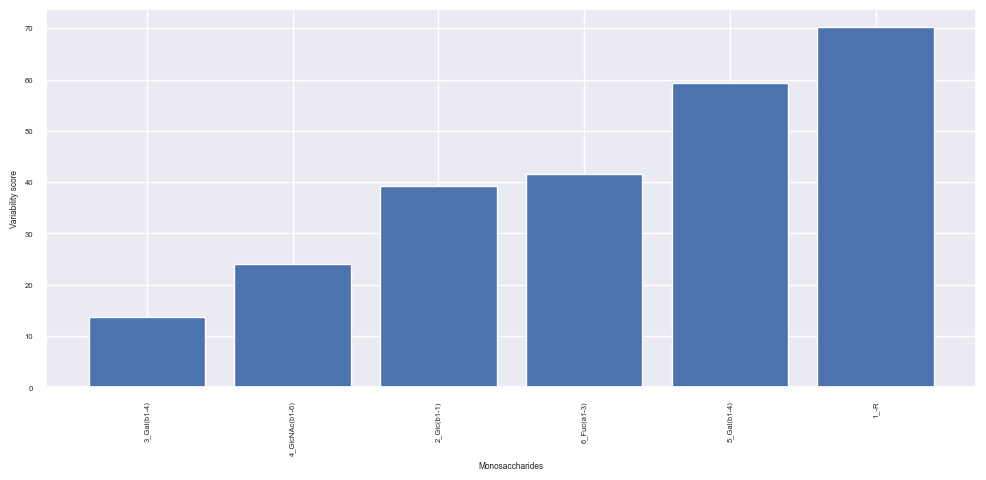

In [25]:
plot_monosaccharide_unstability(glycan, flex, format='png', mode='mean')

# Current function to handle node indices mapping between glycowork and glycontact graphs

In [ ]:
def convert_pdb_graph_to_glycowork(g):
    """
    Converts a PDB-format graph to glycowork format.
    Args:
        g (nx.Graph): Input graph in PDB format with Monosaccharide and score attributes
    Returns:
        nx.Graph: Converted graph in glycowork format with monosaccharide/linkage split into separate nodes
    """
    import networkx as nx
    new_g = nx.Graph()
    # Find reducing end (node connected to -R node 1)
    reducing_end = None
    for n in g.neighbors(1):
        reducing_end = n
        break
    if reducing_end is None:
        raise ValueError("Could not find reducing end (node connected to -R)")
    # Get node list in DFS order starting from reducing end (excluding -R node)
    nodes = [n for n in nx.dfs_preorder_nodes(g, reducing_end) if n != 1]
    # Create mapping dict
    mapping = {}
    mapping[1] = []  # -R maps to nothing
    # Calculate highest node number
    max_num = 2 * (len(g.nodes) - 2)
    # Map reducing end to highest number
    mapping[reducing_end] = [max_num]
    # Map rest of nodes in reverse order
    curr_num = 0
    for node in reversed(nodes[1:]):  # Skip reducing end
        mapping[node] = [curr_num, curr_num + 1]
        curr_num += 2
    # Create nodes in new graph
    for old_node, new_nodes in mapping.items():
        if not new_nodes:  # Skip -R
            continue 
        # Get numerical attributes
        attrs = {k: v for k, v in g.nodes[old_node].items() 
                if k not in ['Monosaccharide', 'string_labels']}
        mono_link = g.nodes[old_node]['Monosaccharide']
        if len(new_nodes) == 1:  # Reducing end
            mono = mono_link.split('(')[0]
            new_g.add_node(new_nodes[0], string_labels=mono, **attrs)
        else:  # Normal nodes
            mono = mono_link.split('(')[0]
            link = mono_link.split('(')[1][:-1]  
            new_g.add_node(new_nodes[0], string_labels=mono, **attrs)
            new_g.add_node(new_nodes[1], string_labels=link, **attrs)
            new_g.add_edge(new_nodes[0], new_nodes[1])
    # Add edges between components
    for old_u, old_v in g.edges():
        new_u = mapping.get(old_u, [])
        new_v = mapping.get(old_v, [])  
        if not new_u or not new_v:  # Skip if either is -R
            continue
        if len(new_u) == 1:  # u is reducing end
            u_node = new_u[0]
        else:
            u_node = new_u[0]  # Use monosaccharide node 
        if len(new_v) == 1:  # v is reducing end
            v_node = new_v[0]
        else:
            v_node = new_v[1]  # Use linkage node
        new_g.add_edge(u_node, v_node)
    return new_g

# Update glycan dict using new GlycoShape data

In [6]:
#How many glycoshape data do we have so far?
import pickle
with open('glycan_graphs.pkl', 'rb') as f:
    d=pickle.load(f)

print(len(d))
x = 0
for g in d : 
    if d[g] == 'FAILED'  :
        x+=1
print(x)

633
114


In [2]:
#get glycoshape data

# 22/01/2025 - 607 directories in glycan_pdb, before updating

### Retrieve all available IUPAC sequences from GlycoShape
iupac_list = get_glycoshape_IUPAC()
print(len(iupac_list))

### Download all GlycoShape structures except those already downloaded
my_glycans_path = "glycans_pdb/"
my_glycans_list = os.listdir(my_glycans_path)

for g in iupac_list:
    if g not in my_glycans_list :
        download_from_glycoshape(my_path = my_glycans_path, IUPAC = g)
        
# Note: single monosaccharide data are ignored, as well as some badly formated files


639
This IUPAC corresponds to a single monosaccharide: ignored
This IUPAC corresponds to a single monosaccharide: ignored
This IUPAC corresponds to a single monosaccharide: ignored
This IUPAC corresponds to a single monosaccharide: ignored
This IUPAC is not formated properly: ignored
This IUPAC corresponds to a single monosaccharide: ignored
This IUPAC corresponds to a single monosaccharide: ignored


# Solving the mapping problem :)




In [3]:
### Functions used below

import pickle
import networkx as nx


def remove_and_concatenate_labels(graph):
    nodes_to_remove = []  # List to store nodes that need to be removed
    
    # Iterate through nodes in sorted order to ensure proper handling
    for node in sorted(graph.nodes):
        if node % 2 == 1:  # Odd index
            neighbors = list(graph.neighbors(node))
            if len(neighbors) > 1:  # Only connect neighbors if there's more than one
                for i in range(len(neighbors)):
                    for j in range(i + 1, len(neighbors)):
                        graph.add_edge(neighbors[i], neighbors[j])  # Add edge between neighbors
    
            predecessor = node - 1  # Get predecessor index
            if predecessor in graph.nodes:  # Ensure the predecessor exists
                # Concatenate string_labels
                predecessor_label = graph.nodes[predecessor].get("string_labels", "")
                current_label = graph.nodes[node].get("string_labels", "")
                graph.nodes[predecessor]["string_labels"] = predecessor_label + '('+current_label+')'
            nodes_to_remove.append(node)  # Mark node for removal
    
    # Remove the odd-indexed nodes after processing
    graph.remove_nodes_from(nodes_to_remove)
    
def trim_gcontact(G_contact) :
    # Remove node 1 which corresponds to -R, absent from G_work
    if 1 in G_contact:
        neighbors = list(G_contact.neighbors(1))  # Get the neighbors of node 1
        if len(neighbors) > 1:  # If node 1 has more than one neighbor
            for i in range(len(neighbors)):
                for j in range(i + 1, len(neighbors)):
                    G_contact.add_edge(neighbors[i], neighbors[j])  # Add edge between neighbors
        G_contact.remove_node(1)  # Remove node 1
        
# Function to perform attribute-aware isomorphism check
def compare_graphs_with_attributes(G_contact, G_work):
    # Define a custom node matcher
    def node_match(node_attrs1, node_attrs2):
        # Ensure 'string_labels' in G is part of 'Monosaccharide' in G2
        return (
            'string_labels' in node_attrs1
            and 'Monosaccharide' in node_attrs2
            and node_attrs1['string_labels'] in node_attrs2['Monosaccharide']
        )
    
    # Create an isomorphism matcher with the custom node matcher
    matcher = nx.isomorphism.GraphMatcher(G_work, G_contact, node_match=node_match)
    print(matcher)
    mapping_dict = {} # format= gcontact_index: gwork_index

    if matcher.is_isomorphic():  # Check if the graphs are isomorphic
        print("The graphs are isomorphic with attribute-based constraints.")
        
        # Extract the mapping of nodes
        mapping = matcher.mapping
        print("\nNode Correspondences (G -> G2):")
        for node_g, node_g2 in mapping.items():
            print(f"  G Node {node_g} -> G2 Node {node_g2}")
            mapping_dict[node_g2] = node_g
            
            # Optionally include node attributes
            print("    G Attributes:", G_contact.nodes[node_g2])
            print("    G2 Attributes:", G_work.nodes[node_g])
    else:
        print("The graphs are not isomorphic with the given attribute constraints.")
    
    return(mapping_dict)

def load_data_pdb():
    flex_data_path = 'glycan_graphs.pkl'

    """Load glycan flexibility data and binding data."""
    with open(flex_data_path, 'rb') as file:
        flex_data = pickle.load(file)
    return flex_data

flex_data_pdb_g =  load_data_pdb()

def create_glycontact_annotated_graph(glycan: str, mapping_dict, flex_data_pdb_g: dict = flex_data_pdb_g) -> nx.Graph:
    """Create a glyco-contact annotated graph with flexibility attributes."""
    glycowork_graph = glycan_to_nxGraph(glycan)
    num_nodes = len(glycowork_graph) - 1
    mapper = mapping_dict

    try:
        node_attributes = {node: flex_data_pdb_g[glycan].nodes[node]
                           for node in flex_data_pdb_g[glycan].nodes}
    except KeyError:
        raise KeyError(f'The glycan {glycan} is not present in the flex database')

    # Map attributes to the glycowork graph nodes
    flex_attribute_mapping = {
        mapper[gcontact_node]: attributes
        for gcontact_node, attributes in node_attributes.items()
        if gcontact_node in mapper
    }

    # Assign the mapped attributes to the glycowork graph
    nx.set_node_attributes(glycowork_graph, flex_attribute_mapping)
    return glycowork_graph

In [4]:

with open('glycan_graphs.pkl', 'rb') as f:
    d=pickle.load(f)

glycan = 'Fuc(a1-2)Gal(b1-4)[Fuc(a1-3)]GlcNAc(b1-3)[Fuc(a1-3)[Gal(b1-4)]GlcNAc(b1-6)]Gal(b1-4)Glc'
#glycan = 'Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-3)[Gal(b1-4)GlcNAc(b1-2)[Gal(b1-4)GlcNAc(b1-4)]Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'

G_contact = d[glycan]
G_work = glycan_to_nxGraph(glycan)


# Process the G_work graph
remove_and_concatenate_labels(G_work)

#Process the G_contact graph
trim_gcontact(G_contact)

# Compare the graphs
m_dict = compare_graphs_with_attributes(G_contact, G_work)

# Map networks
G_mapped = create_glycontact_annotated_graph(glycan, mapping_dict=m_dict)

The graphs are isomorphic with attribute-based constraints.

Node Correspondences (G -> G2):
  G Node 16 -> G2 Node 2
    G Attributes: {'Monosaccharide': 'Glc(b1-1)', 'Mean Score': 2.0514767858432608, 'Median Score': 2.244769612327218, 'Weighted Score': 2.128792897366927, 'weighted_mean_flexibility': 12.17857534246575}
    G2 Attributes: {'string_labels': 'Glc'}
  G Node 14 -> G2 Node 3
    G Attributes: {'Monosaccharide': 'Gal(b1-4)', 'Mean Score': 1.0813572494313122, 'Median Score': 1.0846662780968472, 'Weighted Score': 1.0457681036238264, 'weighted_mean_flexibility': 6.275166123387661}
    G2 Attributes: {'string_labels': 'Gal(b1-4)'}
  G Node 12 -> G2 Node 4
    G Attributes: {'Monosaccharide': 'GlcNAc(b1-6)', 'Mean Score': 1.773262549820356, 'Median Score': 1.6837695762515068, 'Weighted Score': 1.7021496458169612, 'weighted_mean_flexibility': 17.064866673332663}
    G2 Attributes: {'string_labels': 'GlcNAc(b1-6)'}
  G Node 6 -> G2 Node 7
    G Attributes: {'Monosaccharide': 'GlcN

In [5]:
# check mapped graph
G_mapped.__dict__


{'graph': {},
 '_node': {0: {'string_labels': 'Fuc',
   'Monosaccharide': 'Fuc(a1-2)',
   'Mean Score': 1.9629103216109798,
   'Median Score': 2.0159400925040245,
   'Weighted Score': 1.94111501673313,
   'weighted_mean_flexibility': 20.127824177582237},
  1: {'string_labels': 'a1-2'},
  2: {'string_labels': 'Gal',
   'Monosaccharide': 'Gal(b1-4)',
   'Mean Score': 1.7647929069120436,
   'Median Score': 1.7578037350904197,
   'Weighted Score': 1.7861381799561076,
   'weighted_mean_flexibility': 15.575945445455453},
  3: {'string_labels': 'b1-4'},
  4: {'string_labels': 'Fuc',
   'Monosaccharide': 'Fuc(a1-3)',
   'Mean Score': 1.8676189828198404,
   'Median Score': 1.8176706893136725,
   'Weighted Score': 1.9261586474572951,
   'weighted_mean_flexibility': 16.641286591340865},
  5: {'string_labels': 'a1-3'},
  6: {'string_labels': 'GlcNAc',
   'Monosaccharide': 'GlcNAc(b1-3)',
   'Mean Score': 1.6338292866479605,
   'Median Score': 1.6407650627661496,
   'Weighted Score': 1.592153641009

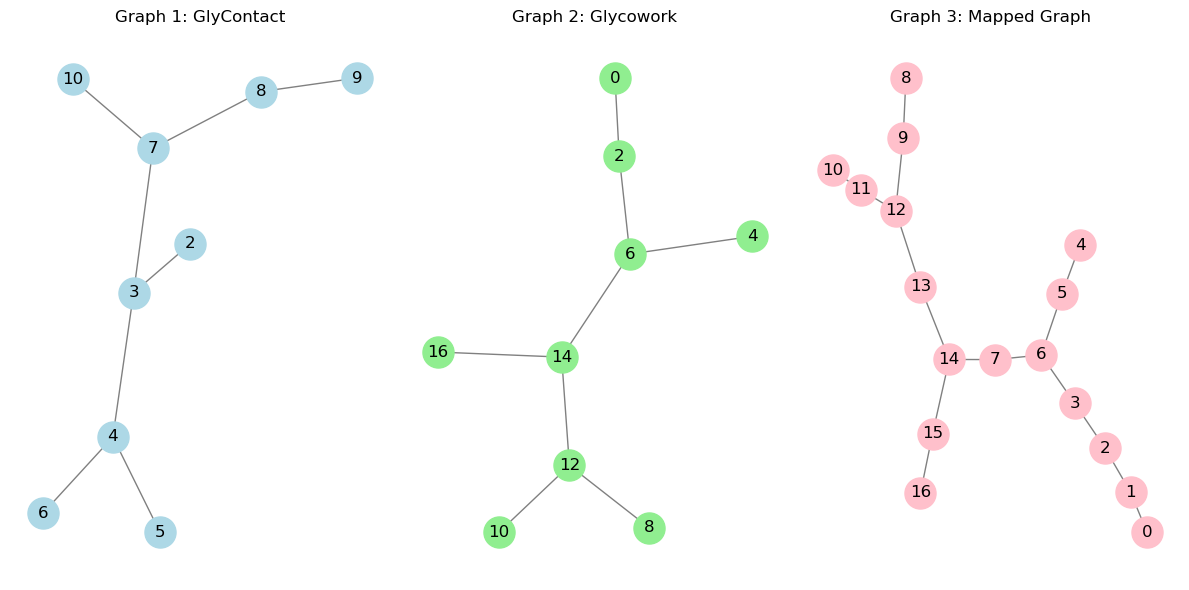

In [6]:

import matplotlib.pyplot as plt


# Plot the graphs side by side
plt.figure(figsize=(12, 6))

# First graph
plt.subplot(1, 3, 1)  # 1 row, 2 columns, position 1
nx.draw(G_contact, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500)
plt.title("Graph 1: GlyContact")

# Second graph
plt.subplot(1, 3, 2)  # 1 row, 2 columns, position 2
nx.draw(G_work, with_labels=True, node_color='lightgreen', edge_color='gray', node_size=500)
plt.title("Graph 2: Glycowork")

# Third graph
plt.subplot(1, 3, 3)  # 1 row, 2 columns, position 2
nx.draw(G_mapped, with_labels=True, node_color='pink', edge_color='gray', node_size=500)
plt.title("Graph 3: Mapped Graph")


plt.tight_layout()
plt.show()
